#**Actividad TFM**
# Asignatura: 14MBID - Trabajo Fin de Master
# Estudiante: Crhistian Orduz

# **Introducción**

Una empresa suiza dedicada al desarrollo de software actualmente tiene la necesidad de conocer como fue el desempeño de los empleados durante el último año (2022) con el fin de evaluar objetivamente al personal y tomar mejores decisiones con respecto al recurso humano para maximizar los resultados generados. 

Para esto se requiere llevar a cabo un análisis de desempeño basado en los datos es decir con enfoque "data-driven", tomando como insumo principal el registro de las tareas ejecutadas por el personal, las cuales fueron reportadas en la plataforma JIRA.


# **Objetivos**



Realizar un análisis de desempeño ejecutando las etapas de la metodología KDD con el fin de generar conocimiento que permita evaluar objetivamente la labor realizada por los empleados durante el último año y aporte valor a la empresa para la toma de decisiones sobre el personal. 


# **Metodologia**

Para llevar a cabo el análisis de desempeño se implementará la metodología KDD (Knowledge Discovery in Databases)



1.	Realizar la selección, preprocesado y modelado de los datos a través las librerías, funciones y métodos vistos.

2.	Aplicar la evaluación de desempeño al personal y realizar el análisis de resultados

3.	Generar visualizaciones de datos basados en las técnicas y conocimientos aprendidos para explicar las conclusiones obtenidas.






# **Fuentes de datos**

El dataset a analizar corresponde a los registros de las actividades realizadas por los empleados durante el 2022. Adicionalmente se utilizaron otros 2 datasets para complementar el dataset inicial y añadir valor al análisis. 

El segundo dataset contiene los datos socio-demográficos de los empleados y el tercer dataset contiene los datos de los empleados correspondientees a los proyectos en los que trabajarón. 


# **Analisis de Datos**

# 1. Importar librerias y modulos  


Inicialmente importo las librerias y modulos requeridos para trabajar con los datos.

Adicionalmente se importa la clase FeatureSelector, archivo que  está adjunto a la práctica. FeatureSelector permite analizar missings values, evaluar la importancia de las variables, identificar el valor de las correlaciones, etc.

In [2]:
# carga de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# machine learning 
from Feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


from sklearn.utils import resample,shuffle#

# 2. Cargar datos

Cargamos los datos dentro del entorno como un dataframe para poder trabajarlos con las funcionalidades que nos permite Google Colab

In [3]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

El primer dataset es el consolidado de todas las tareas ejecutadas por los empleados de cada una de las sedes de la empresa, las cuales fueron reportadas en la plataforma JIRA. 

Por lo que visualizamos las primeras 5 líneas de nuestro conjunto de datos para tener un concepto inicial.

In [4]:
Data = upload_files()
Data.head()

Saving D1.csv to D1.csv
User uploaded file "D1.csv" with length 81874 bytes


Nombre_Empleado Apellido_Empleado  Sucursal  Cumplimiento   Efectividad  \
0            LIAM             SMITH         2          18.20         0.15   
1            NOAH           JOHNSON         5          31.75         0.07   
2          OLIVER          WILLIAMS         5          39.71         0.14   
3          ELIJAH             BROWN         3          23.23         0.06   
4         WILLIAM             JONES         4           5.41         0.19   

   Tareas Alto  Tareas Medio  Tareas Bajo  
0         0.85          0.06         0.09  
1         0.57          0.00         0.43  
2         0.65          0.11         0.24  
3         0.57          0.00         0.43  
4         0.55          0.11         0.34

Se concatenan los atributos del Nombre y Apellido del empleado para generar un nuevo atributo denominado "Nombre_Completo" con el fin de facilitar el manejo de los datos. 

In [5]:
Data['Nombre_Empleado'] = Data['Nombre_Empleado'].astype(str)
Data['Apellido_Empleado'] = Data['Apellido_Empleado'].astype(str)
Data['Nombre_Completo'] = Data.apply(lambda row: row['Nombre_Empleado'] + " " + row['Apellido_Empleado'], axis=1)

Se mueve el nuevo atributo generado a la tercera posición del dataset para dar mayor orden y sentido a los datos.

In [6]:
column_names = Data.columns
new_order = column_names[:2].tolist() + column_names[-1:].tolist() + column_names[2:-1].tolist()
Data = Data[new_order]
print(Data)

     Nombre_Empleado Apellido_Empleado    Nombre_Completo  Sucursal  \
0               LIAM             SMITH         LIAM SMITH         2   
1               NOAH           JOHNSON       NOAH JOHNSON         5   
2             OLIVER          WILLIAMS    OLIVER WILLIAMS         5   
3             ELIJAH             BROWN       ELIJAH BROWN         3   
4            WILLIAM             JONES      WILLIAM JONES         4   
...              ...               ...                ...       ...   
1838        MADALYNN             CERNA     MADALYNN CERNA         2   
1839          MELANI        VIRAMONTES  MELANI VIRAMONTES         3   
1840         LAYLANI          GALDAMEZ   LAYLANI GALDAMEZ         2   
1841        MAZIKEEN            OLIVER    MAZIKEEN OLIVER         6   
1842           BELLE          ANDERSON     BELLE ANDERSON         3   

      Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Tareas Bajo  
0             18.20         0.15         0.85          0.06         0.09

Consulto los formatos de las variables usando info(). Se observa que la mayoria de los atributos son de tipo numérico, mientras que el "Nombre_Empleado", "Apellido_Empleado" y "Nombre_Completo" son los unicos atrinutos alfanuméricos.



In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre_Empleado    1843 non-null   object 
 1   Apellido_Empleado  1843 non-null   object 
 2   Nombre_Completo    1843 non-null   object 
 3   Sucursal           1843 non-null   int64  
 4   Cumplimiento       1843 non-null   float64
 5   Efectividad        1843 non-null   float64
 6   Tareas Alto        1843 non-null   float64
 7   Tareas Medio       1843 non-null   float64
 8   Tareas Bajo        1843 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 129.7+ KB


Dimensiono el tamaño del dataset

In [8]:
print(Data.shape) 

(1843, 9)


Otra forma de consultar los formatos de los atributos es usando dtypes, la cuál nos dará el tipo de atributos presentes en el dataset.

In [9]:
print(Data.dtypes)

Nombre_Empleado       object
Apellido_Empleado     object
Nombre_Completo       object
Sucursal               int64
Cumplimiento         float64
Efectividad          float64
Tareas Alto          float64
Tareas Medio         float64
Tareas Bajo          float64
dtype: object


Valido el nombre de las columnas del dataset.

In [10]:
Data.columns

Index(['Nombre_Empleado', 'Apellido_Empleado', 'Nombre_Completo', 'Sucursal',
       'Cumplimiento ', 'Efectividad', 'Tareas Alto', 'Tareas Medio',
       'Tareas Bajo'],
      dtype='object')

Con este metodo se comprueba la tipología de los atributos del dataset (Cuantitativos - Cualitativos) respectivamente.



In [11]:
df_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Sucursal' 'Cumplimiento ' 'Efectividad' 'Tareas Alto' 'Tareas Medio'
 'Tareas Bajo']


In [12]:
df_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Nombre_Empleado' 'Apellido_Empleado' 'Nombre_Completo']


Se valida la existencia de registros duplicados en el dataset. 
Aunque se evidencia que no hay registros duplicados

In [13]:
Data.duplicated().value_counts()

False    1843
dtype: int64

**Missing values**

Analizo los valores nulos en cada una de las variables por medio de diferentes métodos existentes.

Uno de los métodos es sumar los valores nulos que tiene cada variable, usando la función sum

In [14]:
Data.isnull().sum()

Nombre_Empleado      0
Apellido_Empleado    0
Nombre_Completo      0
Sucursal             0
Cumplimiento         0
Efectividad          0
Tareas Alto          0
Tareas Medio         0
Tareas Bajo          0
dtype: int64

Otro método para analizar valores nulos es a través de un heatmap, en el cuál se visualizan en diferentes colores las columnas que presentan missings values. 

<Axes: >

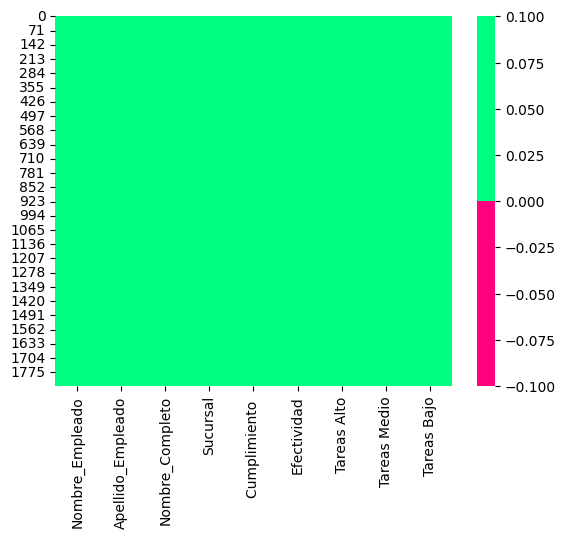

In [15]:
cols = Data.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

Podemos ver a continuación el porcentaje de missing values que tiene cada uno de los atributos. Para ello, itero sobre un bucle for por cada una de las columnas del dataset.

Nombre_Empleado - 0%
Apellido_Empleado - 0%
Nombre_Completo - 0%
Sucursal - 0%
Cumplimiento  - 0%
Efectividad - 0%
Tareas Alto - 0%
Tareas Medio - 0%
Tareas Bajo - 0%


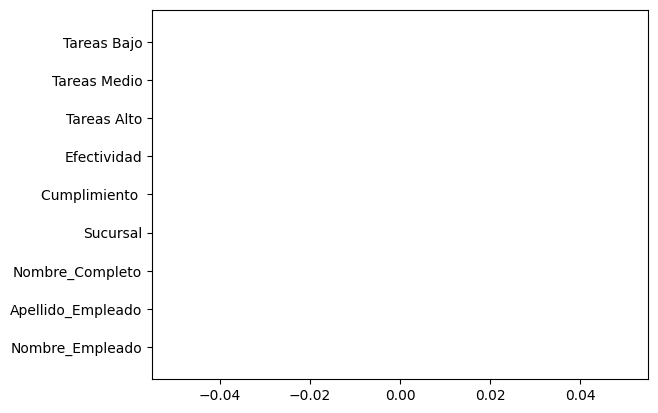

In [16]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

Utilizo feature selector para identificar el número de missing values por cada atributo y si exiten atributos que superen el 80% de missing values en sus registros. 

In [17]:
fs = FeatureSelector(data = Data, labels = Data.columns)
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



Visualizo el porcentaje de missing values por atributo consolidado en formato de tabla. 

In [18]:
fs.missing_stats

missing_fraction
Nombre_Empleado                 0.0
Apellido_Empleado               0.0
Nombre_Completo                 0.0
Sucursal                        0.0
Cumplimiento                    0.0
Efectividad                     0.0
Tareas Alto                     0.0
Tareas Medio                    0.0
Tareas Bajo                     0.0

Revisó si los datos estan balaceados, por lo que los agrupo por sucursal, lo cual me muestra que efectivamnete los datos estan balanceados ya que existe una distribución equitativa en el numero de empleados en cada suscursal.

In [19]:
Data.groupby(['Sucursal'])['Sucursal'].count()

Sucursal
1    312
2    287
3    322
4    310
5    306
6    306
Name: Sucursal, dtype: int64

A través de un grafico de barras visualizo  que existen aproximadamnete 300 empleados por sucursal, siendo la sucrusal 1 la que tiene la mayor cantidad de empelados 312 mientras que la sucursal 2 es la que tiene la menor cantidad de empelados con 287. 

<Axes: >

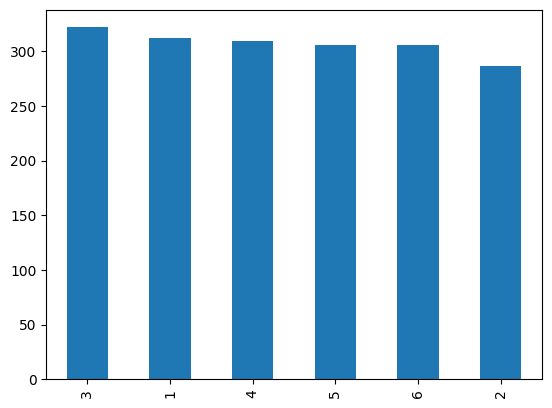

In [20]:
Data['Sucursal'].value_counts().plot.bar()

# 3. Consolidar datos

Procedo a cargar los demas datasets a utilizar con el fin de aportar valor al analisis de desempeño y adicionalmente obtener un mejor resultado en la fase de modelado.

Utilizo esta función para disponer de la visualización completa de todos los atributos deL dataset.

In [21]:
pd.set_option('display.max_columns', None)

El segundo dataset contiene los datos socio-demograficos de los empleados, los cuales fueron entregados por el area de Recursos Humanos de la empresa, ya que se encontraban asociados a los perfiles de los empleados en la pltaforma de JIRA

In [22]:
Empleados = upload_files()
Empleados.head()

Saving D2.csv to D2.csv
User uploaded file "D2.csv" with length 214538 bytes


Nombre_Empleado Apellido_Empleado  Nombre_Completo Genero  \
0            LIAM             SMITH       LIAM SMITH      M   
1            NOAH           JOHNSON     NOAH JOHNSON      M   
2          OLIVER          WILLIAMS  OLIVER WILLIAMS      M   
3          ELIJAH             BROWN     ELIJAH BROWN      M   
4         WILLIAM             JONES    WILLIAM JONES      M   

                      Cargo Nivel cargo  Edad          Ubicacion    Modalidad  \
0    Arquitecto de Software      Senior     45    Basilea, Suiza  Teletrabajo   
1  Ingeniero de software II      Senior     25     Zurich, Suiza   Presencial   
2    Arquitecto de Software      Senior     45     Lyon, Francia      Hibrido   
3  Especialista de Software      Senior     38     Lyon, Francia  Teletrabajo   
4    Arquitecto de Software      Senior     46  Touluse, Francia  Teletrabajo   

   Salario   Estado Civil    Telefono   Contrato Indefinido   
0   $60,000              S     9505405                    Si  
1   $36,000              C     9734761                    No  
2   $36,000              S     9593611                    No  
3   $36,000              C     9466722                    No  
4   $36,000              C     9621580                    Si

In [23]:
print(Empleados.dtypes)

Nombre_Empleado          object
Apellido_Empleado        object
Nombre_Completo          object
Genero                   object
Cargo                    object
Nivel cargo              object
Edad                      int64
Ubicacion                object
Modalidad                object
 Salario                 object
 Estado Civil            object
 Telefono                 int64
 Contrato Indefinido     object
dtype: object


Procedo a unir los datasets aprovechando que en ambos dataframes existe el atributo "Nombre_Completo", por lo que realizo el cruce a través de un left join sobre el dataset principal (Data)

In [24]:
Data=Data.merge(Empleados, on='Nombre_Completo', how='left')
Data

Nombre_Empleado_x Apellido_Empleado_x    Nombre_Completo  Sucursal  \
0                 LIAM               SMITH         LIAM SMITH         2   
1                 NOAH             JOHNSON       NOAH JOHNSON         5   
2               OLIVER            WILLIAMS    OLIVER WILLIAMS         5   
3               ELIJAH               BROWN       ELIJAH BROWN         3   
4              WILLIAM               JONES      WILLIAM JONES         4   
...                ...                 ...                ...       ...   
1838          MADALYNN               CERNA     MADALYNN CERNA         2   
1839            MELANI          VIRAMONTES  MELANI VIRAMONTES         3   
1840           LAYLANI            GALDAMEZ   LAYLANI GALDAMEZ         2   
1841          MAZIKEEN              OLIVER    MAZIKEEN OLIVER         6   
1842             BELLE            ANDERSON     BELLE ANDERSON         3   

      Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Tareas Bajo  \
0             18.20         0.15         0.85          0.06         0.09   
1             31.75         0.07         0.57          0.00         0.43   
2             39.71         0.14         0.65          0.11         0.24   
3             23.23         0.06         0.57          0.00         0.43   
4              5.41         0.19         0.55          0.11         0.34   
...             ...          ...          ...           ...          ...   
1838          19.07         0.96         0.58          0.17         0.25   
1839          24.57         0.91         0.58          0.17         0.25   
1840           4.61         0.95         0.58          0.17         0.25   
1841          25.53         0.99         0.58          0.17         0.25   
1842          22.48         0.98         0.58          0.17         0.25   

     Nombre_Empleado_y Apellido_Empleado_y Genero  \
0                 LIAM               SMITH      M   
1                 NOAH             JOHNSON      M   
2               OLIVER            WILLIAMS      M   
3               ELIJAH               BROWN      M   
4              WILLIAM               JONES      M   
...                ...                 ...    ...   
1838          MADALYNN               CERNA      F   
1839            MELANI          VIRAMONTES      F   
1840           LAYLANI            GALDAMEZ      F   
1841          MAZIKEEN              OLIVER      F   
1842             BELLE            ANDERSON      F   

                             Cargo Nivel cargo  Edad          Ubicacion  \
0           Arquitecto de Software      Senior   45.0    Basilea, Suiza   
1         Ingeniero de software II      Senior   25.0     Zurich, Suiza   
2           Arquitecto de Software      Senior   45.0     Lyon, Francia   
3         Especialista de Software      Senior   38.0     Lyon, Francia   
4           Arquitecto de Software      Senior   46.0  Touluse, Francia   
...                            ...         ...    ...               ...   
1838      Especialista de Software      Junior   24.0    Madrid, España   
1839       Ingeniero de software I      Junior   29.0     Zurich, Suiza   
1840      Especialista de Software      Junior   25.0    Madrid, España   
1841       Ingeniero de software I      Junior   21.0  Touluse, Francia   
1842  Desarrollador de software II      Junior   22.0    Ginebra, Suiza   

        Modalidad  Salario   Estado Civil    Telefono   Contrato Indefinido   
0     Teletrabajo   $60,000              S   9505405.0                    Si  
1      Presencial   $36,000              C   9734761.0                    No  
2         Hibrido   $36,000              S   9593611.0                    No  
3     Teletrabajo   $36,000              C   9466722.0                    No  
4     Teletrabajo   $36,000              C   9621580.0                    Si  
...           ...       ...            ...         ...                   ...  
1838  Teletrabajo    $9,000              C   8829509.0                    No  
1839      Hibrido    

El tercer dataset contiene los datos del desempeño de los empleados de acuerdo a los proyectos en los que trabajaron, los cuales fueron entregados por el area de proyectos (PMO) de la empresa.

In [25]:
Desempeño = upload_files()
Desempeño.head()

Saving D3.csv to D3.csv
User uploaded file "D3.csv" with length 158207 bytes


Nombre_Empleado Apellido_Empleado  Nombre_Completo  ID_Empleado   Año  \
0            LIAM             SMITH       LIAM SMITH         1001  2022   
1            NOAH           JOHNSON     NOAH JOHNSON         1002  2022   
2          OLIVER          WILLIAMS  OLIVER WILLIAMS         1003  2022   
3          ELIJAH             BROWN     ELIJAH BROWN         1004  2022   
4         WILLIAM             JONES    WILLIAM JONES         1005  2022   

       Proyecto  Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0       JustVDB    10.81          0.85           0.81               0.48   
1  CloudConnect    25.45          0.74           0.83               0.69   
2     CyberSafe    28.69          0.76           0.74               0.52   
3       AIBoost    13.20          0.75           0.82               0.54   
4       AIBoost     9.44          0.89           0.86               0.50   

      Reclamaciones  
0  99 Reclamaciones  
1  63 Reclamaciones  
2  66 Reclamaciones  
3  19 Reclamaciones  
4  16 Reclamaciones

In [26]:
print(Empleados.dtypes)

Nombre_Empleado          object
Apellido_Empleado        object
Nombre_Completo          object
Genero                   object
Cargo                    object
Nivel cargo              object
Edad                      int64
Ubicacion                object
Modalidad                object
 Salario                 object
 Estado Civil            object
 Telefono                 int64
 Contrato Indefinido     object
dtype: object


Procedo nuevamente a unir los datasets aprovechando que en ambos dataframes existe el atributo "Nombre_Completo", por lo que repito el cruce a través de un left join sobre el dataset principal (Data)

In [27]:
Data=Data.merge(Desempeño, on='Nombre_Completo', how='left')
Data

Nombre_Empleado_x Apellido_Empleado_x    Nombre_Completo  Sucursal  \
0                 LIAM               SMITH         LIAM SMITH         2   
1                 NOAH             JOHNSON       NOAH JOHNSON         5   
2               OLIVER            WILLIAMS    OLIVER WILLIAMS         5   
3               ELIJAH               BROWN       ELIJAH BROWN         3   
4              WILLIAM               JONES      WILLIAM JONES         4   
...                ...                 ...                ...       ...   
1838          MADALYNN               CERNA     MADALYNN CERNA         2   
1839            MELANI          VIRAMONTES  MELANI VIRAMONTES         3   
1840           LAYLANI            GALDAMEZ   LAYLANI GALDAMEZ         2   
1841          MAZIKEEN              OLIVER    MAZIKEEN OLIVER         6   
1842             BELLE            ANDERSON     BELLE ANDERSON         3   

      Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Tareas Bajo  \
0             18.20         0.15         0.85          0.06         0.09   
1             31.75         0.07         0.57          0.00         0.43   
2             39.71         0.14         0.65          0.11         0.24   
3             23.23         0.06         0.57          0.00         0.43   
4              5.41         0.19         0.55          0.11         0.34   
...             ...          ...          ...           ...          ...   
1838          19.07         0.96         0.58          0.17         0.25   
1839          24.57         0.91         0.58          0.17         0.25   
1840           4.61         0.95         0.58          0.17         0.25   
1841          25.53         0.99         0.58          0.17         0.25   
1842          22.48         0.98         0.58          0.17         0.25   

     Nombre_Empleado_y Apellido_Empleado_y Genero  \
0                 LIAM               SMITH      M   
1                 NOAH             JOHNSON      M   
2               OLIVER            WILLIAMS      M   
3               ELIJAH               BROWN      M   
4              WILLIAM               JONES      M   
...                ...                 ...    ...   
1838          MADALYNN               CERNA      F   
1839            MELANI          VIRAMONTES      F   
1840           LAYLANI            GALDAMEZ      F   
1841          MAZIKEEN              OLIVER      F   
1842             BELLE            ANDERSON      F   

                             Cargo Nivel cargo  Edad          Ubicacion  \
0           Arquitecto de Software      Senior   45.0    Basilea, Suiza   
1         Ingeniero de software II      Senior   25.0     Zurich, Suiza   
2           Arquitecto de Software      Senior   45.0     Lyon, Francia   
3         Especialista de Software      Senior   38.0     Lyon, Francia   
4           Arquitecto de Software      Senior   46.0  Touluse, Francia   
...                            ...         ...    ...               ...   
1838      Especialista de Software      Junior   24.0    Madrid, España   
1839       Ingeniero de software I      Junior   29.0     Zurich, Suiza   
1840      Especialista de Software      Junior   25.0    Madrid, España   
1841       Ingeniero de software I      Junior   21.0  Touluse, Francia   
1842  Desarrollador de software II      Junior   22.0    Ginebra, Suiza   

        Modalidad  Salario   Estado Civil    Telefono   Contrato Indefinido   \
0     Teletrabajo   $60,000              S   9505405.0                    Si   
1      Presencial   $36,000              C   9734761.0                    No   
2         Hibrido   $36,000              S   9593611.0                    No   
3     Teletrabajo   $36,000              C   9466722.0                    No   
4     Teletrabajo   $36,000              C   9621580.0                    Si   
...           ...       ...            ...         ...                   ...   
1838  Teletrabajo    $9,000              C   8829509.0                    No   
1839      Hib

Se eliminaron los atributos que se repetian debido al left join realizado previamente

In [28]:
atributos_a_eliminar = ['Nombre_Empleado', 'Apellido_Empleado','Nombre_Empleado_x', 'Apellido_Empleado_x', 'Nombre_Empleado_y', 'Apellido_Empleado_y']
Data = Data.drop(columns=atributos_a_eliminar)

Repito el proceso realizado con el primer dataset para validar los atributos del dataset consolidado.

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre_Completo        1843 non-null   object 
 1   Sucursal               1843 non-null   int64  
 2   Cumplimiento           1843 non-null   float64
 3   Efectividad            1843 non-null   float64
 4   Tareas Alto            1843 non-null   float64
 5   Tareas Medio           1843 non-null   float64
 6   Tareas Bajo            1843 non-null   float64
 7   Genero                 1808 non-null   object 
 8   Cargo                  1808 non-null   object 
 9   Nivel cargo            1808 non-null   object 
 10  Edad                   1808 non-null   float64
 11  Ubicacion              1808 non-null   object 
 12  Modalidad              1808 non-null   object 
 13   Salario               1808 non-null   object 
 14   Estado Civil          1808 non-null   object 
 15   Tel

In [30]:
print(Data.shape) 

(1843, 25)


In [31]:
print(Data.dtypes)

Nombre_Completo           object
Sucursal                   int64
Cumplimiento             float64
Efectividad              float64
Tareas Alto              float64
Tareas Medio             float64
Tareas Bajo              float64
Genero                    object
Cargo                     object
Nivel cargo               object
Edad                     float64
Ubicacion                 object
Modalidad                 object
 Salario                  object
 Estado Civil             object
 Telefono                float64
 Contrato Indefinido      object
ID_Empleado              float64
Año                      float64
Proyecto                  object
Calidad                  float64
Satisfacción             float64
Productividad            float64
Trabajo en equipo        float64
Reclamaciones             object
dtype: object


In [32]:
Data.columns

Index(['Nombre_Completo', 'Sucursal', 'Cumplimiento ', 'Efectividad',
       'Tareas Alto', 'Tareas Medio', 'Tareas Bajo', 'Genero', 'Cargo',
       'Nivel cargo', 'Edad ', 'Ubicacion', 'Modalidad', ' Salario ',
       ' Estado Civil ', ' Telefono ', ' Contrato Indefinido ', 'ID_Empleado',
       'Año', 'Proyecto', 'Calidad', 'Satisfacción', 'Productividad',
       'Trabajo en equipo', 'Reclamaciones'],
      dtype='object')

In [33]:
df_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Sucursal' 'Cumplimiento ' 'Efectividad' 'Tareas Alto' 'Tareas Medio'
 'Tareas Bajo' 'Edad ' ' Telefono ' 'ID_Empleado' 'Año' 'Calidad'
 'Satisfacción' 'Productividad' 'Trabajo en equipo']


In [34]:
df_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Nombre_Completo' 'Genero' 'Cargo' 'Nivel cargo' 'Ubicacion' 'Modalidad'
 ' Salario ' ' Estado Civil ' ' Contrato Indefinido ' 'Proyecto'
 'Reclamaciones']


In [35]:
Data.duplicated().value_counts()

False    1843
dtype: int64

# 4. Preprocesado de datos

En este punto se realiza la limpieza y tranformación de atributos con el objetivo de preparar los datos antes de su análisis. Por lo cual se realizo la limpieza de datos, transformación de datos y reducción de datos. Esto permitio utilizar los datos de mejor manera y generar un analisis mas completo.

Visualizo el dataset.

In [36]:
Data

Nombre_Completo  Sucursal  Cumplimiento   Efectividad  Tareas Alto  \
0            LIAM SMITH         2          18.20         0.15         0.85   
1          NOAH JOHNSON         5          31.75         0.07         0.57   
2       OLIVER WILLIAMS         5          39.71         0.14         0.65   
3          ELIJAH BROWN         3          23.23         0.06         0.57   
4         WILLIAM JONES         4           5.41         0.19         0.55   
...                 ...       ...            ...          ...          ...   
1838     MADALYNN CERNA         2          19.07         0.96         0.58   
1839  MELANI VIRAMONTES         3          24.57         0.91         0.58   
1840   LAYLANI GALDAMEZ         2           4.61         0.95         0.58   
1841    MAZIKEEN OLIVER         6          25.53         0.99         0.58   
1842     BELLE ANDERSON         3          22.48         0.98         0.58   

      Tareas Medio  Tareas Bajo Genero                         Cargo  \
0             0.06         0.09      M        Arquitecto de Software   
1             0.00         0.43      M      Ingeniero de software II   
2             0.11         0.24      M        Arquitecto de Software   
3             0.00         0.43      M      Especialista de Software   
4             0.11         0.34      M        Arquitecto de Software   
...            ...          ...    ...                           ...   
1838          0.17         0.25      F      Especialista de Software   
1839          0.17         0.25      F       Ingeniero de software I   
1840          0.17         0.25      F      Especialista de Software   
1841          0.17         0.25      F       Ingeniero de software I   
1842          0.17         0.25      F  Desarrollador de software II   

     Nivel cargo  Edad          Ubicacion    Modalidad  Salario   \
0         Senior   45.0    Basilea, Suiza  Teletrabajo   $60,000   
1         Senior   25.0     Zurich, Suiza   Presencial   $36,000   
2         Senior   45.0     Lyon, Francia      Hibrido   $36,000   
3         Senior   38.0     Lyon, Francia  Teletrabajo   $36,000   
4         Senior   46.0  Touluse, Francia  Teletrabajo   $36,000   
...          ...    ...               ...          ...       ...   
1838      Junior   24.0    Madrid, España  Teletrabajo    $9,000   
1839      Junior   29.0     Zurich, Suiza      Hibrido    $7,000   
1840      Junior   25.0    Madrid, España      Hibrido   $13,000   
1841      Junior   21.0  Touluse, Francia      Hibrido   $13,000   
1842      Junior   22.0    Ginebra, Suiza      Hibrido   $12,000   

      Estado Civil    Telefono   Contrato Indefinido   ID_Empleado     Año  \
0                 S   9505405.0                    Si       1001.0  2022.0   
1                 C   9734761.0                    No       1002.0  2022.0   
2                 S   9593611.0                    No       1003.0  2022.0   
3                 C   9466722.0                    No       1004.0  2022.0   
4                 C   9621580.0                    Si       1005.0  2022.0   
...             ...         ...                   ...          ...     ...   
1838              C   8829509.0                    No       2839.0  2022.0   
1839              C   9877030.0                    Si       2840.0  2022.0   
1840              O   9237633.0                    No       2841.0  2022.0   
1841              S   9378389.0                    No       2842.0  2022.0   
1842              O   8887108.0                    No       2843.0  2022.0   

          Proyecto  Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          JustVDB    10.81          0.85           0.81               0.48   
1     CloudConnect    25.45          0.74           0.83               0.69   
2        CyberSafe    28.69          0.76           0.74               0.52   
3          AIBoost    13.20          0.75           0.82               0.54   
4          AIBoost     9.44          0.89           0.86 

Inicialmente valido valores faltantes

In [37]:
Data.isnull().sum()

Nombre_Completo           0
Sucursal                  0
Cumplimiento              0
Efectividad               0
Tareas Alto               0
Tareas Medio              0
Tareas Bajo               0
Genero                   35
Cargo                    35
Nivel cargo              35
Edad                     35
Ubicacion                35
Modalidad                35
 Salario                 35
 Estado Civil            35
 Telefono                35
 Contrato Indefinido     35
ID_Empleado              35
Año                      35
Proyecto                 35
Calidad                  35
Satisfacción             35
Productividad            35
Trabajo en equipo        35
Reclamaciones            35
dtype: int64

En el heatmap visualizo las columnas del dataset consolidado que presentan missings values.

<Axes: >

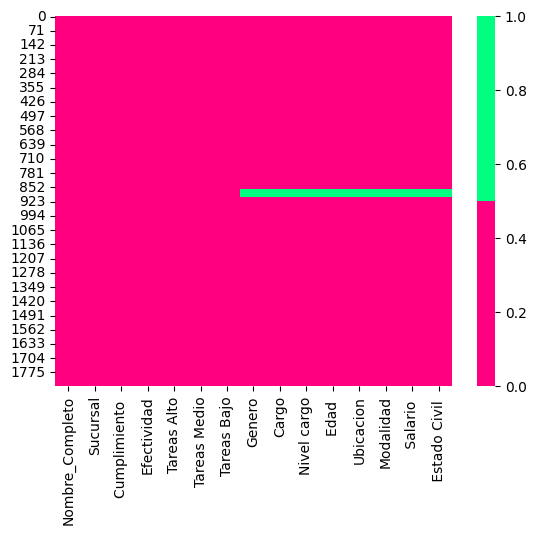

In [38]:
cols = Data.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

Consulto nuevamente el porcentaje de missing values que tiene cada uno de los atributos del dataset consolidado.

Nombre_Completo - 0%
Sucursal - 0%
Cumplimiento  - 0%
Efectividad - 0%
Tareas Alto - 0%
Tareas Medio - 0%
Tareas Bajo - 0%
Genero - 2%
Cargo - 2%
Nivel cargo - 2%
Edad  - 2%
Ubicacion - 2%
Modalidad - 2%
 Salario  - 2%
 Estado Civil  - 2%
 Telefono  - 2%
 Contrato Indefinido  - 2%
ID_Empleado - 2%
Año - 2%
Proyecto - 2%
Calidad - 2%
Satisfacción - 2%
Productividad - 2%
Trabajo en equipo - 2%
Reclamaciones - 2%


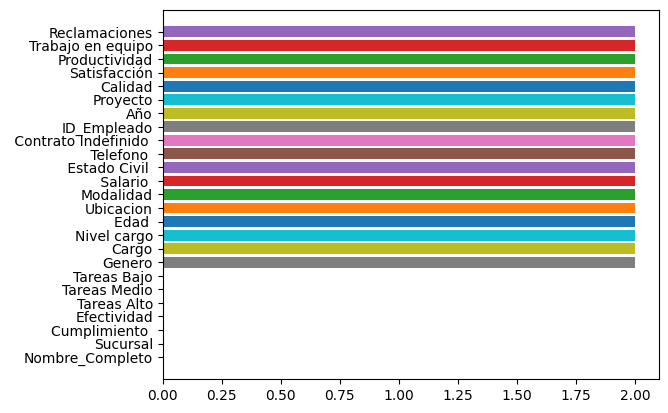

In [39]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

Genero un histograma con la distribución de los missing values. El cual indica que aproximadamente 1800 registros que presentan 0 missing values mientras que 19 registros presentan 35 missing values. 

created missing indicator for: Genero
created missing indicator for: Cargo
created missing indicator for: Nivel cargo
created missing indicator for: Edad 
created missing indicator for: Ubicacion
created missing indicator for: Modalidad
created missing indicator for:  Salario 
created missing indicator for:  Estado Civil 
created missing indicator for:  Telefono 
created missing indicator for:  Contrato Indefinido 
created missing indicator for: ID_Empleado
created missing indicator for: Año
created missing indicator for: Proyecto
created missing indicator for: Calidad
created missing indicator for: Satisfacción
created missing indicator for: Productividad
created missing indicator for: Trabajo en equipo
created missing indicator for: Reclamaciones


<Axes: xlabel='index'>

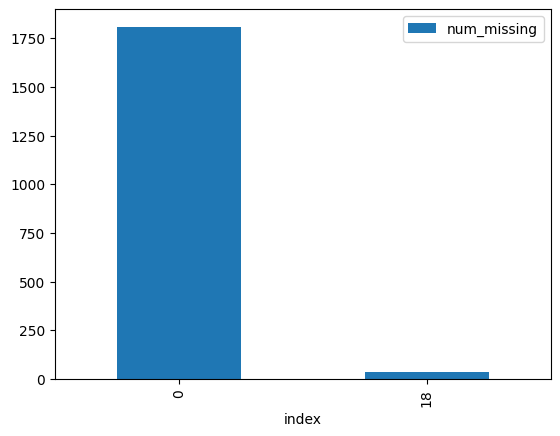

In [40]:
Data_missings=Data.copy()
for col in Data_missings.columns:
    missing = Data_missings[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        Data_missings['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in Data_missings.columns if 'ismissing' in col]

Data_missings['num_missing'] = Data_missings[ismissing_cols].sum(axis=1)

Data_missings['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Consulto las filas para ver si tienen muchos missings values. Se evidencio que no tengo ninguna fila con más de 12 missing values.

In [41]:
#¿Dejar o no dejar la instancia?
# drop rows with a lot of missing values.
ind_missing = Data_missings[Data_missings['num_missing'] > 12].index
df_less_missing_rows = Data_missings.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(1808, 44)


Consulto las columnas para ver si tienen muchos missings values. Se evidencio que no tengo ninguna columna con más de 12 missing values. Por lo cual el datatset consolidado se mantiene con el mismo número de columnas. 

In [42]:
#¿Dejar o no dejar la característica?
def filter_na(datos, nivelna = 0.8): # Porcentaje de missings por el que queremos filtrar
    por_na = datos.isnull().mean() # calculamos la media
    names =list(por_na[por_na < nivelna].index) #elimina las variables <= que ese valor
    return pd.DataFrame(datos.filter(names, axis = 1))

Data=filter_na(Data) #devuelve el dataset filtrado

print(Data.shape)

(1843, 25)


A través de esta función confirmo que efectivamente ningun atributo del dataset consolidado presenta mas de 80% de missign values. 

In [43]:
fs = FeatureSelector(data = Data, labels = Data.columns)
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



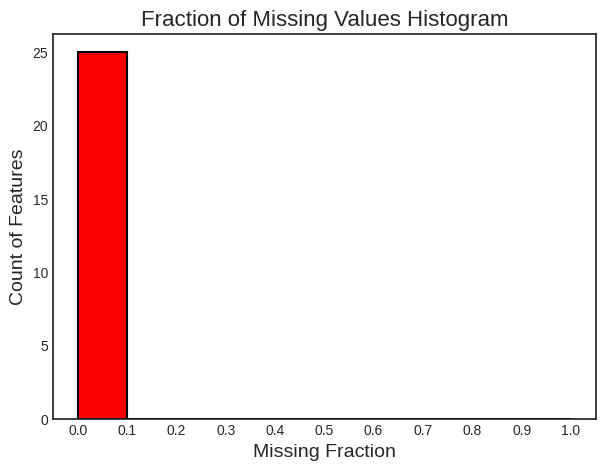

In [44]:
fs.plot_missing()

In [45]:
Data.isnull().mean()*100

Nombre_Completo          0.000000
Sucursal                 0.000000
Cumplimiento             0.000000
Efectividad              0.000000
Tareas Alto              0.000000
Tareas Medio             0.000000
Tareas Bajo              0.000000
Genero                   1.899078
Cargo                    1.899078
Nivel cargo              1.899078
Edad                     1.899078
Ubicacion                1.899078
Modalidad                1.899078
 Salario                 1.899078
 Estado Civil            1.899078
 Telefono                1.899078
 Contrato Indefinido     1.899078
ID_Empleado              1.899078
Año                      1.899078
Proyecto                 1.899078
Calidad                  1.899078
Satisfacción             1.899078
Productividad            1.899078
Trabajo en equipo        1.899078
Reclamaciones            1.899078
dtype: float64

Procedo a gestionar los valores missing existentes. Podria eliminarlos a traves de la funcion "Dropna" pero dichos emepleados quedarian por fuera de analisis por los cual procedo a imputar los valores nulos con la moda. 

In [46]:
Data['Genero'].fillna(Data['Genero'].mode()[0], inplace=True)
Data['Modalidad'].fillna(Data['Modalidad'].mode()[0], inplace=True)
Data['Cargo'].fillna(Data['Cargo'].mode()[0], inplace=True)
Data['Nivel cargo'].fillna(Data['Nivel cargo'].mode()[0], inplace=True)
Data['Edad '].fillna(Data['Edad '].mode()[0], inplace=True)
Data[' Salario '].fillna(Data[' Salario '].mode()[0], inplace=True)
Data['Calidad'].fillna(Data['Calidad'].mode()[0], inplace=True)
Data['Satisfacción'].fillna(Data['Satisfacción'].mode()[0], inplace=True)
Data['Productividad'].fillna(Data['Productividad'].mode()[0], inplace=True)
Data['Trabajo en equipo'].fillna(Data['Trabajo en equipo'].mode()[0], inplace=True)
Data['Reclamaciones'].fillna(Data['Reclamaciones'].mode()[0], inplace=True)
Data['Proyecto'].fillna(Data['Proyecto'].mode()[0], inplace=True)
Data['Ubicacion'].fillna(Data['Ubicacion'].mode()[0], inplace=True)
Data['ID_Empleado'].fillna(Data['ID_Empleado'].mode()[0], inplace=True)

In [47]:
Data

Nombre_Completo  Sucursal  Cumplimiento   Efectividad  Tareas Alto  \
0            LIAM SMITH         2          18.20         0.15         0.85   
1          NOAH JOHNSON         5          31.75         0.07         0.57   
2       OLIVER WILLIAMS         5          39.71         0.14         0.65   
3          ELIJAH BROWN         3          23.23         0.06         0.57   
4         WILLIAM JONES         4           5.41         0.19         0.55   
...                 ...       ...            ...          ...          ...   
1838     MADALYNN CERNA         2          19.07         0.96         0.58   
1839  MELANI VIRAMONTES         3          24.57         0.91         0.58   
1840   LAYLANI GALDAMEZ         2           4.61         0.95         0.58   
1841    MAZIKEEN OLIVER         6          25.53         0.99         0.58   
1842     BELLE ANDERSON         3          22.48         0.98         0.58   

      Tareas Medio  Tareas Bajo Genero                         Cargo  \
0             0.06         0.09      M        Arquitecto de Software   
1             0.00         0.43      M      Ingeniero de software II   
2             0.11         0.24      M        Arquitecto de Software   
3             0.00         0.43      M      Especialista de Software   
4             0.11         0.34      M        Arquitecto de Software   
...            ...          ...    ...                           ...   
1838          0.17         0.25      F      Especialista de Software   
1839          0.17         0.25      F       Ingeniero de software I   
1840          0.17         0.25      F      Especialista de Software   
1841          0.17         0.25      F       Ingeniero de software I   
1842          0.17         0.25      F  Desarrollador de software II   

     Nivel cargo  Edad          Ubicacion    Modalidad  Salario   \
0         Senior   45.0    Basilea, Suiza  Teletrabajo   $60,000   
1         Senior   25.0     Zurich, Suiza   Presencial   $36,000   
2         Senior   45.0     Lyon, Francia      Hibrido   $36,000   
3         Senior   38.0     Lyon, Francia  Teletrabajo   $36,000   
4         Senior   46.0  Touluse, Francia  Teletrabajo   $36,000   
...          ...    ...               ...          ...       ...   
1838      Junior   24.0    Madrid, España  Teletrabajo    $9,000   
1839      Junior   29.0     Zurich, Suiza      Hibrido    $7,000   
1840      Junior   25.0    Madrid, España      Hibrido   $13,000   
1841      Junior   21.0  Touluse, Francia      Hibrido   $13,000   
1842      Junior   22.0    Ginebra, Suiza      Hibrido   $12,000   

      Estado Civil    Telefono   Contrato Indefinido   ID_Empleado     Año  \
0                 S   9505405.0                    Si       1001.0  2022.0   
1                 C   9734761.0                    No       1002.0  2022.0   
2                 S   9593611.0                    No       1003.0  2022.0   
3                 C   9466722.0                    No       1004.0  2022.0   
4                 C   9621580.0                    Si       1005.0  2022.0   
...             ...         ...                   ...          ...     ...   
1838              C   8829509.0                    No       2839.0  2022.0   
1839              C   9877030.0                    Si       2840.0  2022.0   
1840              O   9237633.0                    No       2841.0  2022.0   
1841              S   9378389.0                    No       2842.0  2022.0   
1842              O   8887108.0                    No       2843.0  2022.0   

          Proyecto  Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          JustVDB    10.81          0.85           0.81               0.48   
1     CloudConnect    25.45          0.74           0.83               0.69   
2        CyberSafe    28.69          0.76           0.74               0.52   
3          AIBoost    13.20          0.75           0.82               0.54   
4          AIBoost     9.44          0.89           0.86 

Consulto nuevamente el nombre de los atributos del dataset consolidado

In [48]:
column_names = Data.columns
print(column_names)

Index(['Nombre_Completo', 'Sucursal', 'Cumplimiento ', 'Efectividad',
       'Tareas Alto', 'Tareas Medio', 'Tareas Bajo', 'Genero', 'Cargo',
       'Nivel cargo', 'Edad ', 'Ubicacion', 'Modalidad', ' Salario ',
       ' Estado Civil ', ' Telefono ', ' Contrato Indefinido ', 'ID_Empleado',
       'Año', 'Proyecto', 'Calidad', 'Satisfacción', 'Productividad',
       'Trabajo en equipo', 'Reclamaciones'],
      dtype='object')


Eliminó el símbolo de dolar del atributo "Salario", adicionalmente reemplazo la coma por punto para que el atributo se entienda como de tipo decimal y se pueda trabajar.

In [49]:
Data[' Salario '] = Data[' Salario '].str.replace('$', '').str.replace(',', '.').astype(float)

<ipython-input-49-8b24176958b3>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Valido el cambio realizado al atributo "Salario"

In [50]:
print(Data.dtypes)

Nombre_Completo           object
Sucursal                   int64
Cumplimiento             float64
Efectividad              float64
Tareas Alto              float64
Tareas Medio             float64
Tareas Bajo              float64
Genero                    object
Cargo                     object
Nivel cargo               object
Edad                     float64
Ubicacion                 object
Modalidad                 object
 Salario                 float64
 Estado Civil             object
 Telefono                float64
 Contrato Indefinido      object
ID_Empleado              float64
Año                      float64
Proyecto                  object
Calidad                  float64
Satisfacción             float64
Productividad            float64
Trabajo en equipo        float64
Reclamaciones             object
dtype: object


In [51]:
Data

Nombre_Completo  Sucursal  Cumplimiento   Efectividad  Tareas Alto  \
0            LIAM SMITH         2          18.20         0.15         0.85   
1          NOAH JOHNSON         5          31.75         0.07         0.57   
2       OLIVER WILLIAMS         5          39.71         0.14         0.65   
3          ELIJAH BROWN         3          23.23         0.06         0.57   
4         WILLIAM JONES         4           5.41         0.19         0.55   
...                 ...       ...            ...          ...          ...   
1838     MADALYNN CERNA         2          19.07         0.96         0.58   
1839  MELANI VIRAMONTES         3          24.57         0.91         0.58   
1840   LAYLANI GALDAMEZ         2           4.61         0.95         0.58   
1841    MAZIKEEN OLIVER         6          25.53         0.99         0.58   
1842     BELLE ANDERSON         3          22.48         0.98         0.58   

      Tareas Medio  Tareas Bajo Genero                         Cargo  \
0             0.06         0.09      M        Arquitecto de Software   
1             0.00         0.43      M      Ingeniero de software II   
2             0.11         0.24      M        Arquitecto de Software   
3             0.00         0.43      M      Especialista de Software   
4             0.11         0.34      M        Arquitecto de Software   
...            ...          ...    ...                           ...   
1838          0.17         0.25      F      Especialista de Software   
1839          0.17         0.25      F       Ingeniero de software I   
1840          0.17         0.25      F      Especialista de Software   
1841          0.17         0.25      F       Ingeniero de software I   
1842          0.17         0.25      F  Desarrollador de software II   

     Nivel cargo  Edad          Ubicacion    Modalidad   Salario   \
0         Senior   45.0    Basilea, Suiza  Teletrabajo       60.0   
1         Senior   25.0     Zurich, Suiza   Presencial       36.0   
2         Senior   45.0     Lyon, Francia      Hibrido       36.0   
3         Senior   38.0     Lyon, Francia  Teletrabajo       36.0   
4         Senior   46.0  Touluse, Francia  Teletrabajo       36.0   
...          ...    ...               ...          ...        ...   
1838      Junior   24.0    Madrid, España  Teletrabajo        9.0   
1839      Junior   29.0     Zurich, Suiza      Hibrido        7.0   
1840      Junior   25.0    Madrid, España      Hibrido       13.0   
1841      Junior   21.0  Touluse, Francia      Hibrido       13.0   
1842      Junior   22.0    Ginebra, Suiza      Hibrido       12.0   

      Estado Civil    Telefono   Contrato Indefinido   ID_Empleado     Año  \
0                 S   9505405.0                    Si       1001.0  2022.0   
1                 C   9734761.0                    No       1002.0  2022.0   
2                 S   9593611.0                    No       1003.0  2022.0   
3                 C   9466722.0                    No       1004.0  2022.0   
4                 C   9621580.0                    Si       1005.0  2022.0   
...             ...         ...                   ...          ...     ...   
1838              C   8829509.0                    No       2839.0  2022.0   
1839              C   9877030.0                    Si       2840.0  2022.0   
1840              O   9237633.0                    No       2841.0  2022.0   
1841              S   9378389.0                    No       2842.0  2022.0   
1842              O   8887108.0                    No       2843.0  2022.0   

          Proyecto  Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          JustVDB    10.81          0.85           0.81               0.48   
1     CloudConnect    25.45          0.74           0.83               0.69   
2        CyberSafe    28.69          0.76           0.74               0.52   
3          AIBoost    13.20          0.75           0.82               0.54   
4          AIBoost     9.44          0.89    

Elimino el texto que acompaña a los datos del atributo "Reclamaciones" para dejar unicamnete el valor numérico y adicionalmente convierto el atributo en numérico para poder trabajarlo.

In [52]:
Data['Reclamaciones'] = Data['Reclamaciones'].str.replace(' Reclamaciones', '')
Data['Reclamaciones']=pd.to_numeric(Data['Reclamaciones'])
Data

Nombre_Completo  Sucursal  Cumplimiento   Efectividad  Tareas Alto  \
0            LIAM SMITH         2          18.20         0.15         0.85   
1          NOAH JOHNSON         5          31.75         0.07         0.57   
2       OLIVER WILLIAMS         5          39.71         0.14         0.65   
3          ELIJAH BROWN         3          23.23         0.06         0.57   
4         WILLIAM JONES         4           5.41         0.19         0.55   
...                 ...       ...            ...          ...          ...   
1838     MADALYNN CERNA         2          19.07         0.96         0.58   
1839  MELANI VIRAMONTES         3          24.57         0.91         0.58   
1840   LAYLANI GALDAMEZ         2           4.61         0.95         0.58   
1841    MAZIKEEN OLIVER         6          25.53         0.99         0.58   
1842     BELLE ANDERSON         3          22.48         0.98         0.58   

      Tareas Medio  Tareas Bajo Genero                         Cargo  \
0             0.06         0.09      M        Arquitecto de Software   
1             0.00         0.43      M      Ingeniero de software II   
2             0.11         0.24      M        Arquitecto de Software   
3             0.00         0.43      M      Especialista de Software   
4             0.11         0.34      M        Arquitecto de Software   
...            ...          ...    ...                           ...   
1838          0.17         0.25      F      Especialista de Software   
1839          0.17         0.25      F       Ingeniero de software I   
1840          0.17         0.25      F      Especialista de Software   
1841          0.17         0.25      F       Ingeniero de software I   
1842          0.17         0.25      F  Desarrollador de software II   

     Nivel cargo  Edad          Ubicacion    Modalidad   Salario   \
0         Senior   45.0    Basilea, Suiza  Teletrabajo       60.0   
1         Senior   25.0     Zurich, Suiza   Presencial       36.0   
2         Senior   45.0     Lyon, Francia      Hibrido       36.0   
3         Senior   38.0     Lyon, Francia  Teletrabajo       36.0   
4         Senior   46.0  Touluse, Francia  Teletrabajo       36.0   
...          ...    ...               ...          ...        ...   
1838      Junior   24.0    Madrid, España  Teletrabajo        9.0   
1839      Junior   29.0     Zurich, Suiza      Hibrido        7.0   
1840      Junior   25.0    Madrid, España      Hibrido       13.0   
1841      Junior   21.0  Touluse, Francia      Hibrido       13.0   
1842      Junior   22.0    Ginebra, Suiza      Hibrido       12.0   

      Estado Civil    Telefono   Contrato Indefinido   ID_Empleado     Año  \
0                 S   9505405.0                    Si       1001.0  2022.0   
1                 C   9734761.0                    No       1002.0  2022.0   
2                 S   9593611.0                    No       1003.0  2022.0   
3                 C   9466722.0                    No       1004.0  2022.0   
4                 C   9621580.0                    Si       1005.0  2022.0   
...             ...         ...                   ...          ...     ...   
1838              C   8829509.0                    No       2839.0  2022.0   
1839              C   9877030.0                    Si       2840.0  2022.0   
1840              O   9237633.0                    No       2841.0  2022.0   
1841              S   9378389.0                    No       2842.0  2022.0   
1842              O   8887108.0                    No       2843.0  2022.0   

          Proyecto  Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          JustVDB    10.81          0.85           0.81               0.48   
1     CloudConnect    25.45          0.74           0.83               0.69   
2        CyberSafe    28.69          0.76           0.74               0.52   
3          AIBoost    13.20          0.75           0.82               0.54   
4          AIBoost     9.44          0.89    

Separo los datos del atributo "Ubicación", ya que deseo trabajarlos de forma independiente por lo que generó dos nuevos atributos llamados "Ciudad" y "Pais".

In [53]:
Data[['Ciudad', 'Pais']] = Data['Ubicacion'].str.split(',', expand=True)
Data.drop('Ubicacion', axis=1, inplace=True)
print(Data.head())

   Nombre_Completo  Sucursal  Cumplimiento   Efectividad  Tareas Alto  \
0       LIAM SMITH         2          18.20         0.15         0.85   
1     NOAH JOHNSON         5          31.75         0.07         0.57   
2  OLIVER WILLIAMS         5          39.71         0.14         0.65   
3     ELIJAH BROWN         3          23.23         0.06         0.57   
4    WILLIAM JONES         4           5.41         0.19         0.55   

   Tareas Medio  Tareas Bajo Genero                     Cargo Nivel cargo  \
0          0.06         0.09      M    Arquitecto de Software      Senior   
1          0.00         0.43      M  Ingeniero de software II      Senior   
2          0.11         0.24      M    Arquitecto de Software      Senior   
3          0.00         0.43      M  Especialista de Software      Senior   
4          0.11         0.34      M    Arquitecto de Software      Senior   

   Edad     Modalidad   Salario   Estado Civil    Telefono   \
0   45.0  Teletrabajo       60.0   

Revisó el tipo de atributos una vez ajustaddos los datos

In [54]:
print(Data.dtypes)

Nombre_Completo           object
Sucursal                   int64
Cumplimiento             float64
Efectividad              float64
Tareas Alto              float64
Tareas Medio             float64
Tareas Bajo              float64
Genero                    object
Cargo                     object
Nivel cargo               object
Edad                     float64
Modalidad                 object
 Salario                 float64
 Estado Civil             object
 Telefono                float64
 Contrato Indefinido      object
ID_Empleado              float64
Año                      float64
Proyecto                  object
Calidad                  float64
Satisfacción             float64
Productividad            float64
Trabajo en equipo        float64
Reclamaciones              int64
Ciudad                    object
Pais                      object
dtype: object


A través de un gráfico de boxplot reviso si existen outliers dentro del dataset consolidado. Unicamente se identifica una alta variación en los datos del número de telefono de los empleados, lo cual no es significativo para el analisi, por lo cual este atributo sera eliminado.

En conclusión no considero que existan outliers. a pesar de ser un dataset muy diverso, con atributos numéricos que se manejan en diferentes escalas y de varios tipos de formatos, se evidencia estabilidad en el comportamiento de los datos.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Sucursal'),
  Text(1, 0, 'Cumplimiento '),
  Text(2, 0, 'Efectividad'),
  Text(3, 0, 'Tareas Alto'),
  Text(4, 0, 'Tareas Medio'),
  Text(5, 0, 'Tareas Bajo'),
  Text(6, 0, 'Edad '),
  Text(7, 0, ' Salario '),
  Text(8, 0, ' Telefono '),
  Text(9, 0, 'ID_Empleado'),
  Text(10, 0, 'Año'),
  Text(11, 0, 'Calidad'),
  Text(12, 0, 'Satisfacción'),
  Text(13, 0, 'Productividad'),
  Text(14, 0, 'Trabajo en equipo'),
  Text(15, 0, 'Reclamaciones')])

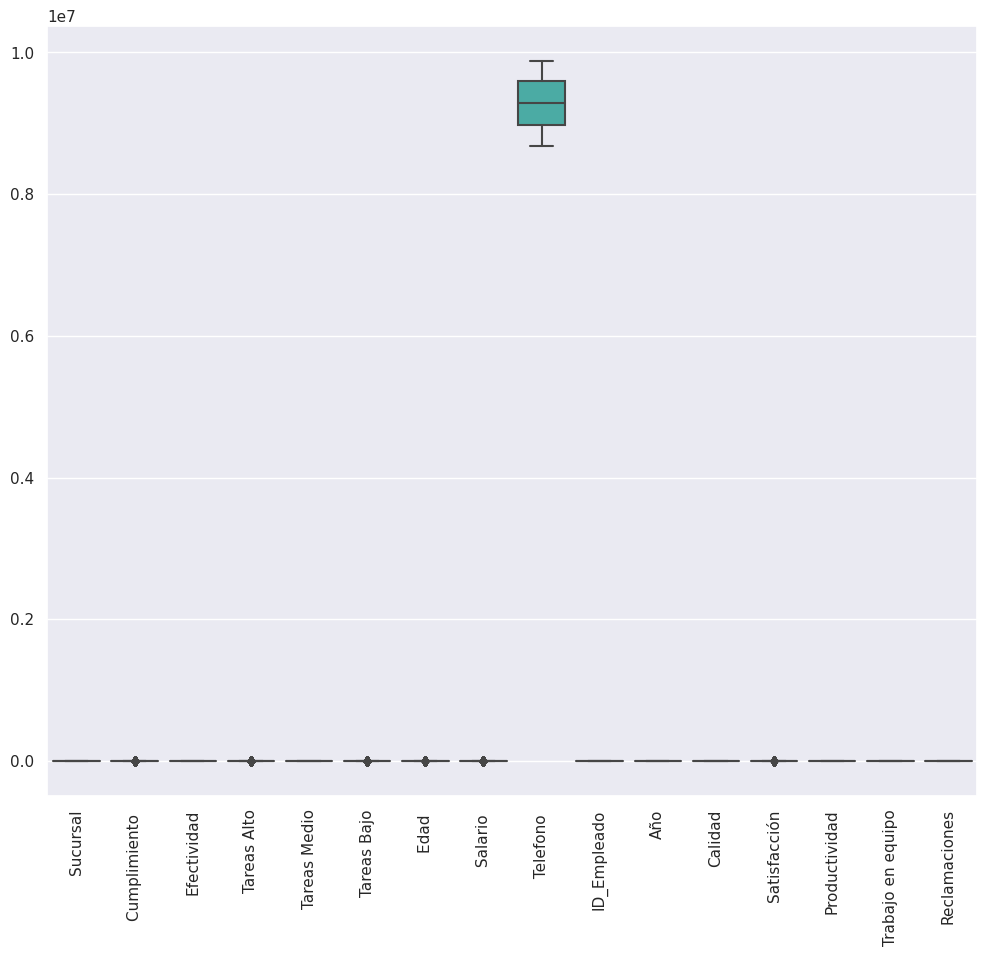

In [55]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=Data)
plt.xticks(rotation=90)

Elimino algunos atributos descriptivos que no son relevantes para el analisis. No se requiere de atributos cualitativos que no tienen afectación en el desempeño del empleado, tales como el "Estado Civil", "Telefono y "Contrato Indefinido". Adicionalmente el atributo "Año" presenta un mismo valor para cada registro ya que es el año en que fueron capturados los datos, por lo cual tampoco es necesario y procedo a eliminarlo.  

In [56]:
Data=Data.drop(columns=["Nombre_Completo", ' Estado Civil ', " Telefono ", ' Contrato Indefinido ', 'Año'], axis=1)
Data

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  \
0            2          18.20         0.15         0.85          0.06   
1            5          31.75         0.07         0.57          0.00   
2            5          39.71         0.14         0.65          0.11   
3            3          23.23         0.06         0.57          0.00   
4            4           5.41         0.19         0.55          0.11   
...        ...            ...          ...          ...           ...   
1838         2          19.07         0.96         0.58          0.17   
1839         3          24.57         0.91         0.58          0.17   
1840         2           4.61         0.95         0.58          0.17   
1841         6          25.53         0.99         0.58          0.17   
1842         3          22.48         0.98         0.58          0.17   

      Tareas Bajo Genero                         Cargo Nivel cargo  Edad   \
0            0.09      M        Arquitecto de Software      Senior   45.0   
1            0.43      M      Ingeniero de software II      Senior   25.0   
2            0.24      M        Arquitecto de Software      Senior   45.0   
3            0.43      M      Especialista de Software      Senior   38.0   
4            0.34      M        Arquitecto de Software      Senior   46.0   
...           ...    ...                           ...         ...    ...   
1838         0.25      F      Especialista de Software      Junior   24.0   
1839         0.25      F       Ingeniero de software I      Junior   29.0   
1840         0.25      F      Especialista de Software      Junior   25.0   
1841         0.25      F       Ingeniero de software I      Junior   21.0   
1842         0.25      F  Desarrollador de software II      Junior   22.0   

        Modalidad   Salario   ID_Empleado      Proyecto  Calidad  \
0     Teletrabajo       60.0       1001.0       JustVDB    10.81   
1      Presencial       36.0       1002.0  CloudConnect    25.45   
2         Hibrido       36.0       1003.0     CyberSafe    28.69   
3     Teletrabajo       36.0       1004.0       AIBoost    13.20   
4     Teletrabajo       36.0       1005.0       AIBoost     9.44   
...           ...        ...          ...           ...      ...   
1838  Teletrabajo        9.0       2839.0      SmartNet    11.57   
1839      Hibrido        7.0       2840.0  CloudConnect    22.04   
1840      Hibrido       13.0       2841.0     CyberSafe     7.81   
1841      Hibrido       13.0       2842.0       AIBoost    21.65   
1842      Hibrido       12.0       2843.0  CloudConnect    21.22   

      Satisfacción  Productividad  Trabajo en equipo  Reclamaciones   Ciudad  \
0             0.85           0.81               0.48             99  Basilea   
1             0.74           0.83               0.69             63   Zurich   
2             0.76           0.74               0.52             66     Lyon   
3             0.75           0.82               0.54             19     Lyon   
4             0.89           0.86               0.50             16  Touluse   
...            ...            ...                ...            ...      ...   
1838          0.37           0.39               0.90             80   Madrid   
1839          0.43           0.46               0.80             71   Zurich   
1840          0.52           0.26               0.70             13   Madrid   
1841          0.19           0.87               0.92             41  Touluse   
1842          0.44           0.55               0.71             46  Ginebra   

          Pais  
0        Suiza  
1        Suiza  
2      Francia  
3      Francia  
4      Francia  
...        ...  
1838    España  
1839     Suiza  
1840    España  
1841   Francia  
1842     Suiza  

[1843 rows x 21 columns]

Exporto la unión de los datasets en un archivo excel, para guardar una copia de seguridad de los datos consolidados.

In [57]:
Data.to_excel('D4.xlsx', index = False)

Valido nuevamnete los atributos que tengo en el dataset.

In [58]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sucursal           1843 non-null   int64  
 1   Cumplimiento       1843 non-null   float64
 2   Efectividad        1843 non-null   float64
 3   Tareas Alto        1843 non-null   float64
 4   Tareas Medio       1843 non-null   float64
 5   Tareas Bajo        1843 non-null   float64
 6   Genero             1843 non-null   object 
 7   Cargo              1843 non-null   object 
 8   Nivel cargo        1843 non-null   object 
 9   Edad               1843 non-null   float64
 10  Modalidad          1843 non-null   object 
 11   Salario           1843 non-null   float64
 12  ID_Empleado        1843 non-null   float64
 13  Proyecto           1843 non-null   object 
 14  Calidad            1843 non-null   float64
 15  Satisfacción       1843 non-null   float64
 16  Productividad      1843 

Analizo los atributos que tienen una correlación lineal superior al 80%. 
Identifíco que existen 2 atributos que están altamente correlacionados. 

In [59]:
fs.identify_collinear(correlation_threshold=0.8)

2 features with a correlation magnitude greater than 0.80.



/content/Feature_selector.py:222: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Los atributos que presentan una alta correlación  (como se indica en la tabla) deben ser eliminados ya que seria redundante mantenerlos en el dataset. Al igual que los atributos que ttienen una baja importancia dentro del datatset.

In [60]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

drop_feature corr_feature  corr_value
1  ID_Empleado  Efectividad    0.953601
0  Tareas Bajo  Tareas Alto   -0.897337

Revisó el nivel de correlación entre los atributos a través de una matriz. 

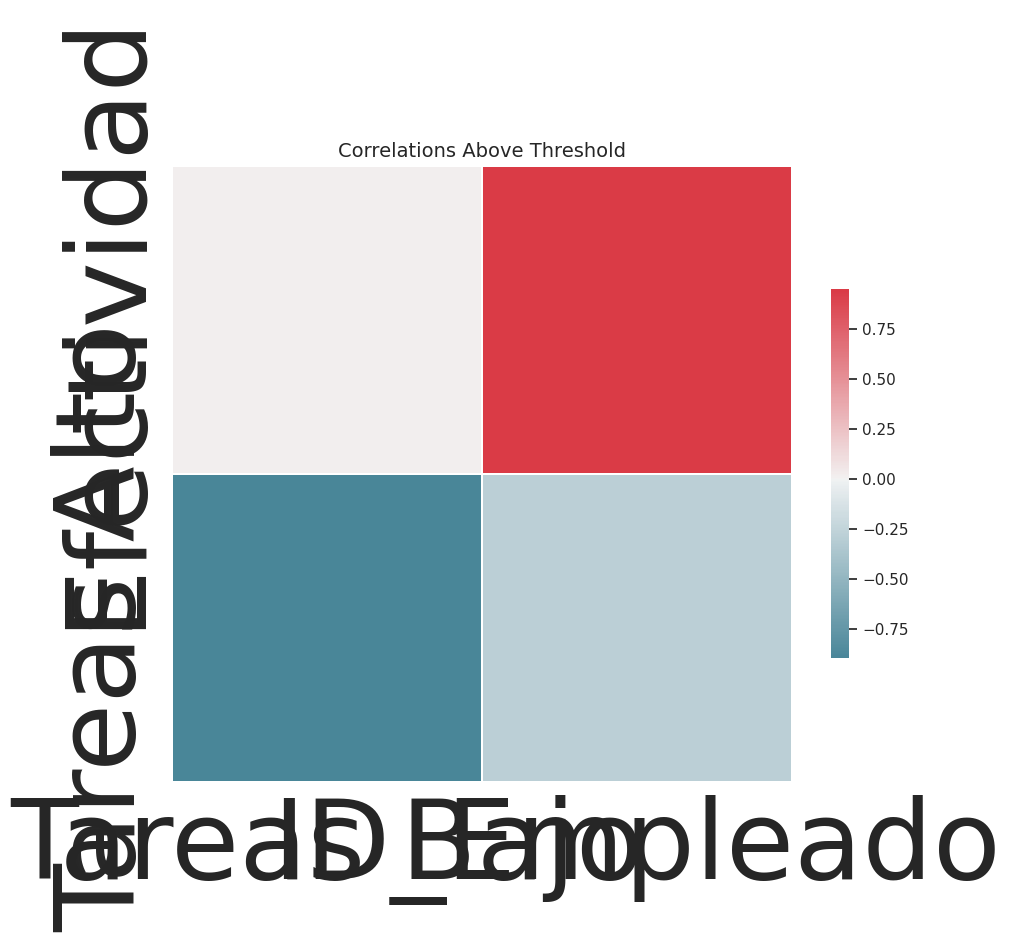

In [61]:
fs.plot_collinear() 

Elimino los atributos que tienen una correlación lineal superior al 80%. 

In [62]:
Data=Data.drop(['Tareas Bajo', 'ID_Empleado'], axis=1)
Data

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio Genero  \
0            2          18.20         0.15         0.85          0.06      M   
1            5          31.75         0.07         0.57          0.00      M   
2            5          39.71         0.14         0.65          0.11      M   
3            3          23.23         0.06         0.57          0.00      M   
4            4           5.41         0.19         0.55          0.11      M   
...        ...            ...          ...          ...           ...    ...   
1838         2          19.07         0.96         0.58          0.17      F   
1839         3          24.57         0.91         0.58          0.17      F   
1840         2           4.61         0.95         0.58          0.17      F   
1841         6          25.53         0.99         0.58          0.17      F   
1842         3          22.48         0.98         0.58          0.17      F   

                             Cargo Nivel cargo  Edad     Modalidad   Salario   \
0           Arquitecto de Software      Senior   45.0  Teletrabajo       60.0   
1         Ingeniero de software II      Senior   25.0   Presencial       36.0   
2           Arquitecto de Software      Senior   45.0      Hibrido       36.0   
3         Especialista de Software      Senior   38.0  Teletrabajo       36.0   
4           Arquitecto de Software      Senior   46.0  Teletrabajo       36.0   
...                            ...         ...    ...          ...        ...   
1838      Especialista de Software      Junior   24.0  Teletrabajo        9.0   
1839       Ingeniero de software I      Junior   29.0      Hibrido        7.0   
1840      Especialista de Software      Junior   25.0      Hibrido       13.0   
1841       Ingeniero de software I      Junior   21.0      Hibrido       13.0   
1842  Desarrollador de software II      Junior   22.0      Hibrido       12.0   

          Proyecto  Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          JustVDB    10.81          0.85           0.81               0.48   
1     CloudConnect    25.45          0.74           0.83               0.69   
2        CyberSafe    28.69          0.76           0.74               0.52   
3          AIBoost    13.20          0.75           0.82               0.54   
4          AIBoost     9.44          0.89           0.86               0.50   
...            ...      ...           ...            ...                ...   
1838      SmartNet    11.57          0.37           0.39               0.90   
1839  CloudConnect    22.04          0.43           0.46               0.80   
1840     CyberSafe     7.81          0.52           0.26               0.70   
1841       AIBoost    21.65          0.19           0.87               0.92   
1842  CloudConnect    21.22          0.44           0.55               0.71   

      Reclamaciones   Ciudad      Pais  
0                99  Basilea     Suiza  
1                63   Zurich     Suiza  
2                66     Lyon   Francia  
3                19     Lyon   Francia  
4                16  Touluse   Francia  
...             ...      ...       ...  
1838             80   Madrid    España  
1839             71   Zurich     Suiza  
1840             13   Madrid    España  
1841             41  Touluse   Francia  
1842             46  Ginebra     Suiza  

[1843 rows x 19 columns]

In [63]:
print(Data.shape) 

(1843, 19)


In [64]:
Data.isnull().sum()

Sucursal             0
Cumplimiento         0
Efectividad          0
Tareas Alto          0
Tareas Medio         0
Genero               0
Cargo                0
Nivel cargo          0
Edad                 0
Modalidad            0
 Salario             0
Proyecto             0
Calidad              0
Satisfacción         0
Productividad        0
Trabajo en equipo    0
Reclamaciones        0
Ciudad               0
Pais                 0
dtype: int64

In [65]:
nombre_archivo = 'datos.xlsx'
Data.to_excel(nombre_archivo, index=False)

# 5. Descripcion de variables (EDA)





En este punto se generan diferentes de graficos que permiten conocer la distribución de los datos ecorrespodientes a los atributos que conforman el dataset. Estas visualizaciones se producen utilizando funciones de las librerias previamente importadas.

In [66]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sucursal           1843 non-null   int64  
 1   Cumplimiento       1843 non-null   float64
 2   Efectividad        1843 non-null   float64
 3   Tareas Alto        1843 non-null   float64
 4   Tareas Medio       1843 non-null   float64
 5   Genero             1843 non-null   object 
 6   Cargo              1843 non-null   object 
 7   Nivel cargo        1843 non-null   object 
 8   Edad               1843 non-null   float64
 9   Modalidad          1843 non-null   object 
 10   Salario           1843 non-null   float64
 11  Proyecto           1843 non-null   object 
 12  Calidad            1843 non-null   float64
 13  Satisfacción       1843 non-null   float64
 14  Productividad      1843 non-null   float64
 15  Trabajo en equipo  1843 non-null   float64
 16  Reclamaciones      1843 

Se realiza un analisis descriptivo de los atributos que conforman el dataset.
Para los atributos numéricos se generan las principales medidas de centralidad y dispersión; Mientras que para los atributos categóricos se genera el listado de los valores presentes en el dataset.

In [67]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [68]:
descripcionDatosDataset(Data)

Cantidad de filas: 1843
Cantidad de columnas: 19
----------------------------------------------------------------------------------------------------
Columna: Sucursal
Tipo de datos: numérico
Descripción de valores:
min       1.000000
max       6.000000
mean      3.504069
std       1.704997
median    4.000000
Name: Sucursal, dtype: float64
----------------------------------------------------------------------------------------------------
Columna: Cumplimiento 
Tipo de datos: numérico
Descripción de valores:
min        0.000000
max       42.080000
mean      25.741085
std        8.455234
median    27.370000
Name: Cumplimiento , dtype: float64
----------------------------------------------------------------------------------------------------
Columna: Efectividad
Tipo de datos: numérico
Descripción de valores:
min       0.000000
max       1.000000
mean      0.503863
std       0.266240
median    0.510000
Name: Efectividad, dtype: float64
---------------------------------------------------

Los empleados son categorizados en 3 niveles segun su perfil laboral (experiencia y conocimiento). Siendo Semi y Junior quienes concentran el casi el 80% del personal de la empresa.

<Axes: xlabel='Nivel cargo', ylabel='count'>

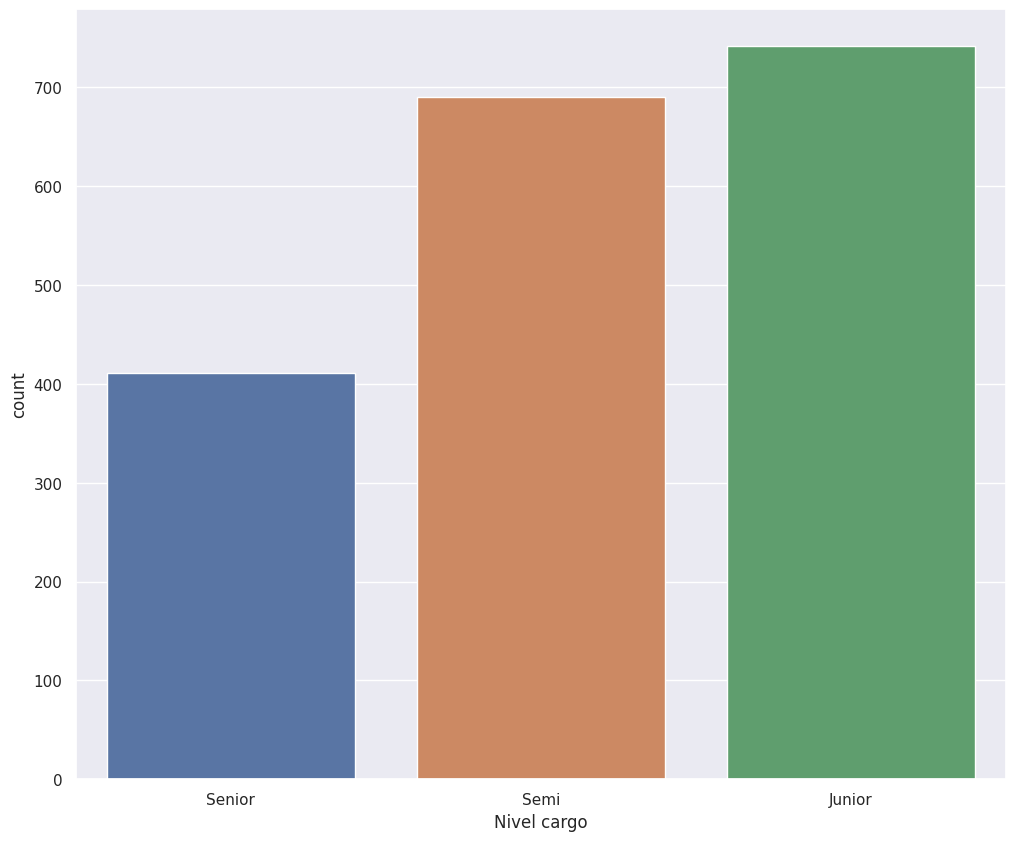

In [69]:
sns.countplot(x="Nivel cargo", data=Data)

Aproximadamente el 65% de los empleados aun trabaja desde la oficina en las sedes de la empresa (ya sea bajo modalidad presencial o modalidad hibrida). 

<Axes: xlabel='Modalidad', ylabel='count'>

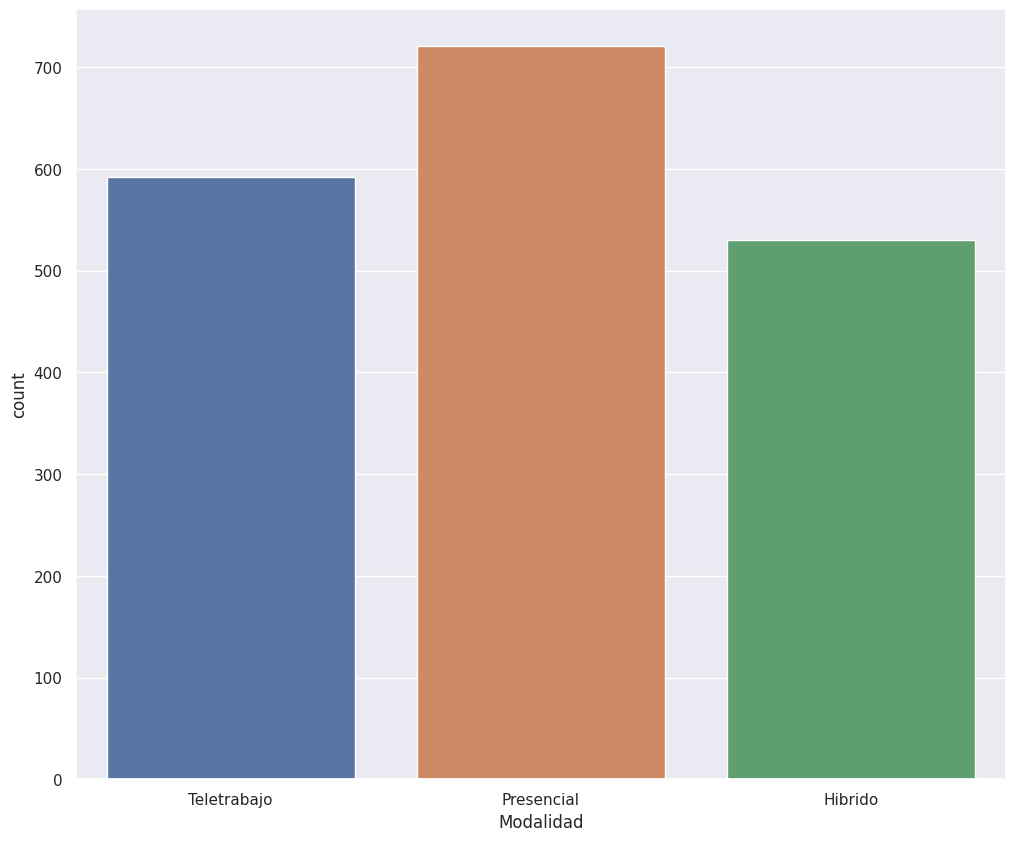

In [70]:
sns.countplot(x="Modalidad", data=Data)

El 52% de los colaboradores que seran evaluados en el analisis de desempeño  son hombres, lo cual se refleja la equitativa particpación que tienen las mujeres en esta empresa, por lo cual en este estudio se validará si el genero del empleado es relvante frente al desempeño que muestra en sus labores.

<Axes: ylabel='Genero'>

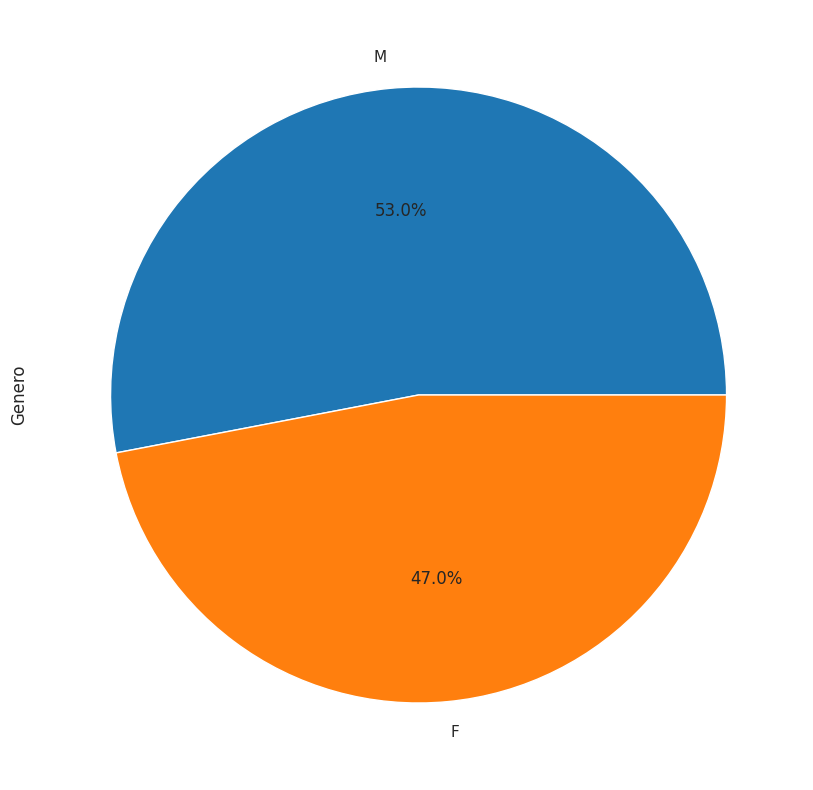

In [71]:
torta1=Data.Genero.value_counts()
torta1.plot.pie(autopct="%1.1f%%")

El año pasado fueron gestionados 7 proyectos en la empresa en los que se encontraban distrbuidos los empleados de acuerdo a la necesidad del proyecto. 

<Axes: xlabel='Proyecto', ylabel='count'>

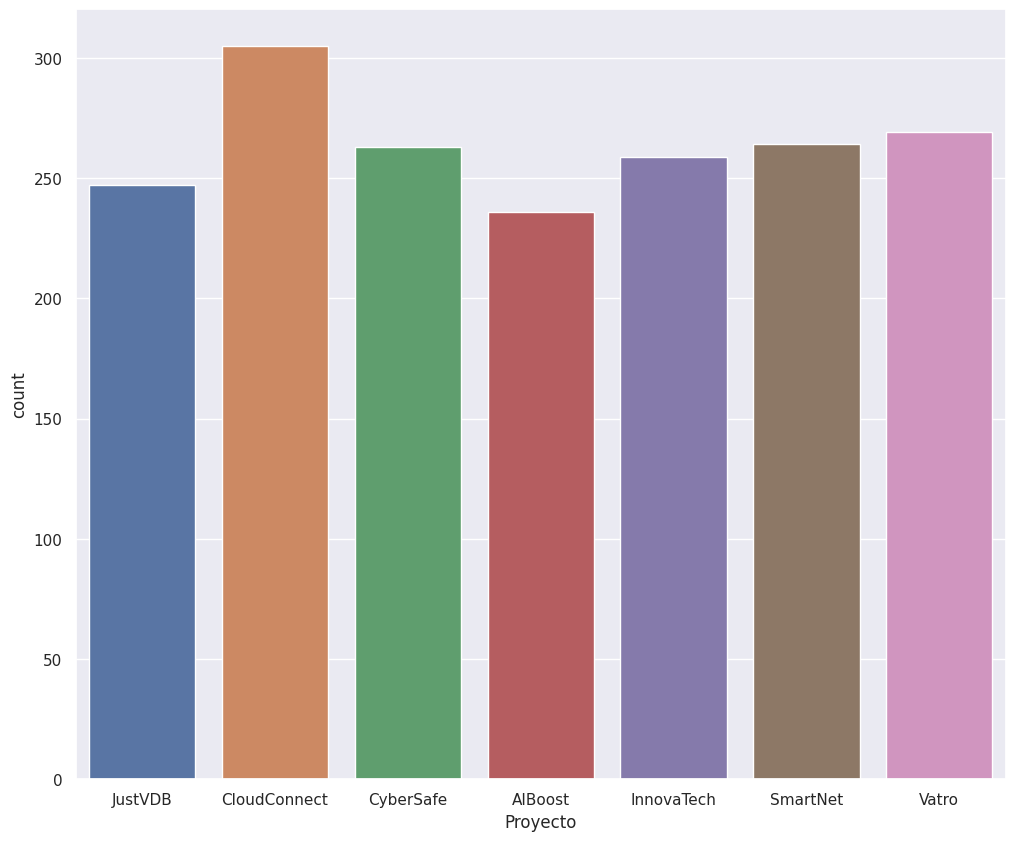

In [72]:
sns.countplot(x="Proyecto", data=Data)

Los empleados se encuentran ubicados en distintas ciudades de Europa, ya que cuentan con diferentes modalidades de trabajo y sedes para trabajar. Los datos de ubicaicón por ciudad se encuentran distribuidos de forma balanceada. 

<Axes: ylabel='Ciudad'>

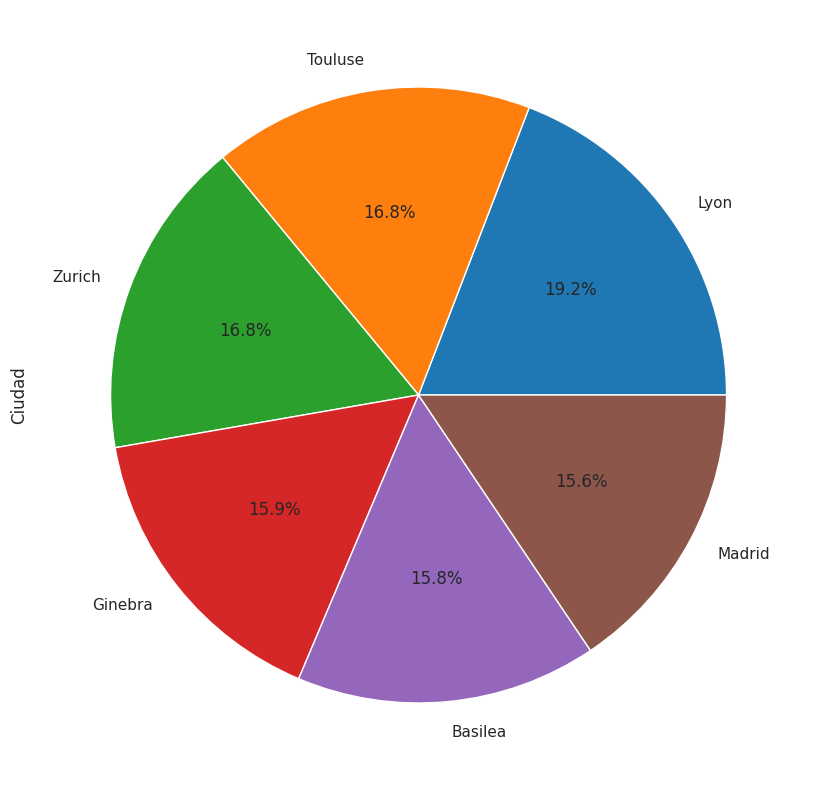

In [73]:
torta=Data.Ciudad.value_counts()
torta.plot.pie(autopct="%1.1f%%")

Dentro de la emoresa se maneja 7 tipos de cargos, teneiendo en cuenta la experiencia, conocimientos tecnicos y formación academica. 

<Axes: xlabel='Cargo', ylabel='count'>

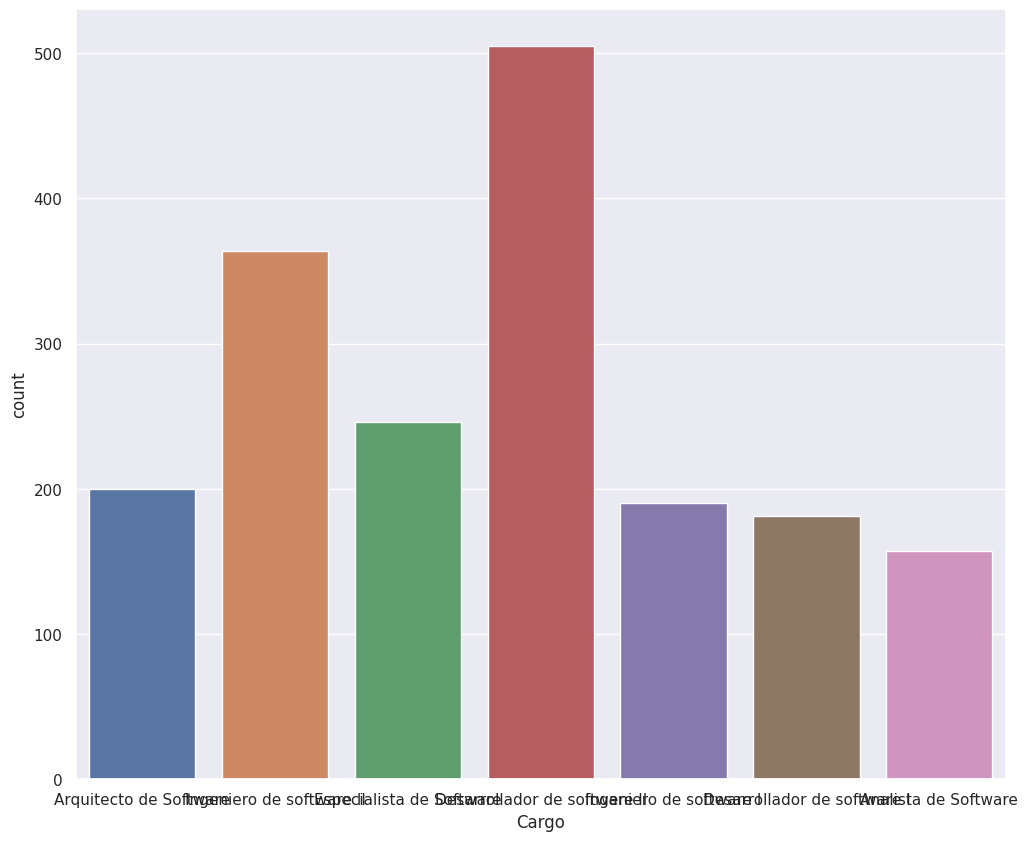

In [74]:
sns.countplot(x="Cargo", data=Data)

A traves de un grafico de boxplot valido la variación que existe en el cumplimiento de las tareas por parte de los diferentes niveles de cargo que hay en la empresa. 

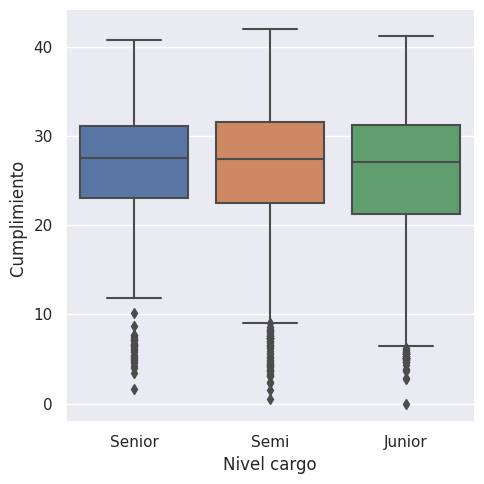

In [75]:
sns.catplot(x="Nivel cargo", y="Cumplimiento ", data=Data, kind="box")
plt.show()

A traves de un grafico de boxplot valido la variación que existe en la calidad de las tareas por parte de los diferentes niveles de cargo que hay en la empresa.

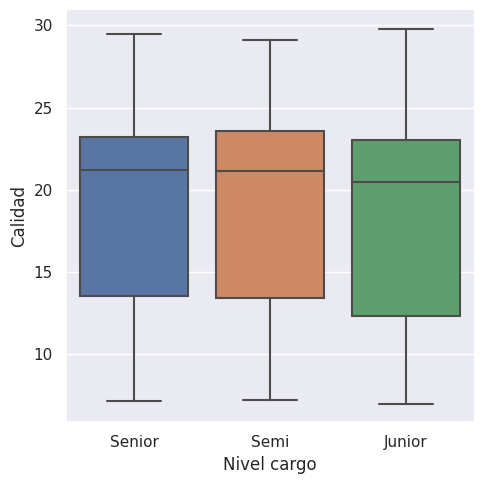

In [76]:
sns.catplot(x="Nivel cargo", y="Calidad", data=Data, kind="box")
plt.show()

Se identifica que la mayoria de empleados cuenta con menores salarios mientras que un menor grupo de empleados acapara los salarios mas altos debido a sus conocimientos especificos y basta experiencia. 

<Axes: >

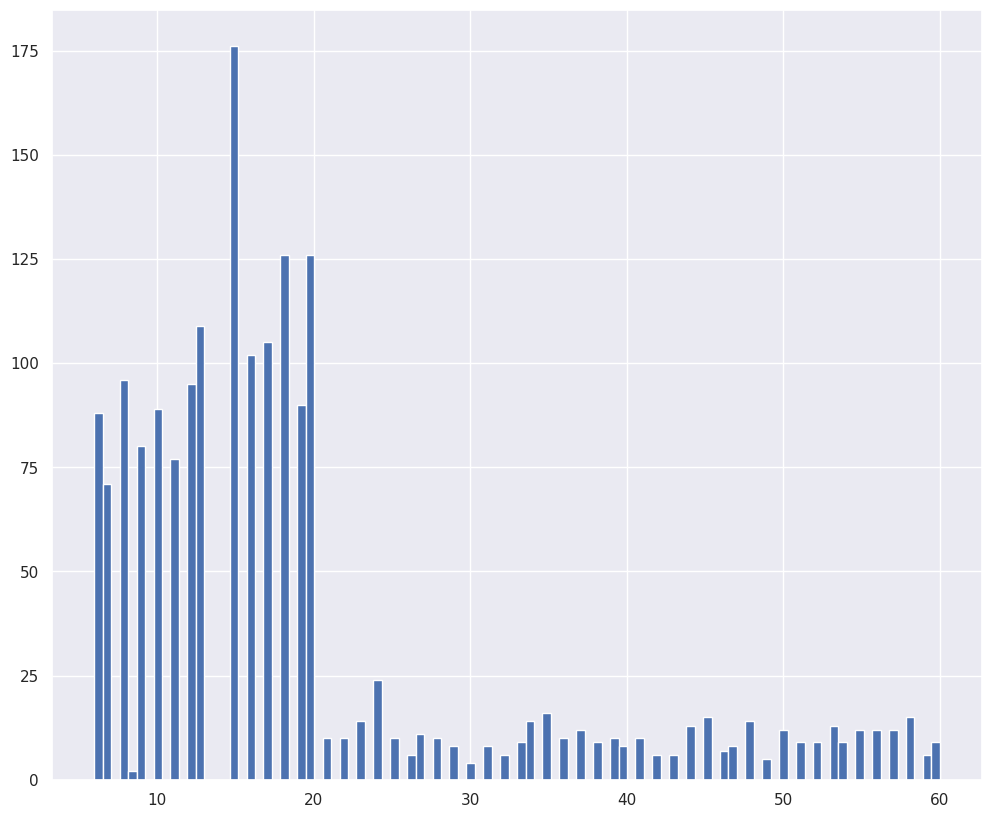

In [77]:
Data[' Salario '].hist(bins=100)

Se identifica que la mayoria del recurso humano se encuentra entre los 18 a 35 años. A partir de los 35 años la cantidad de empleados disminuye. Lo cual se alinea con el grafico anterios ya que se podria asociar al tema de los salarios.

<Axes: >

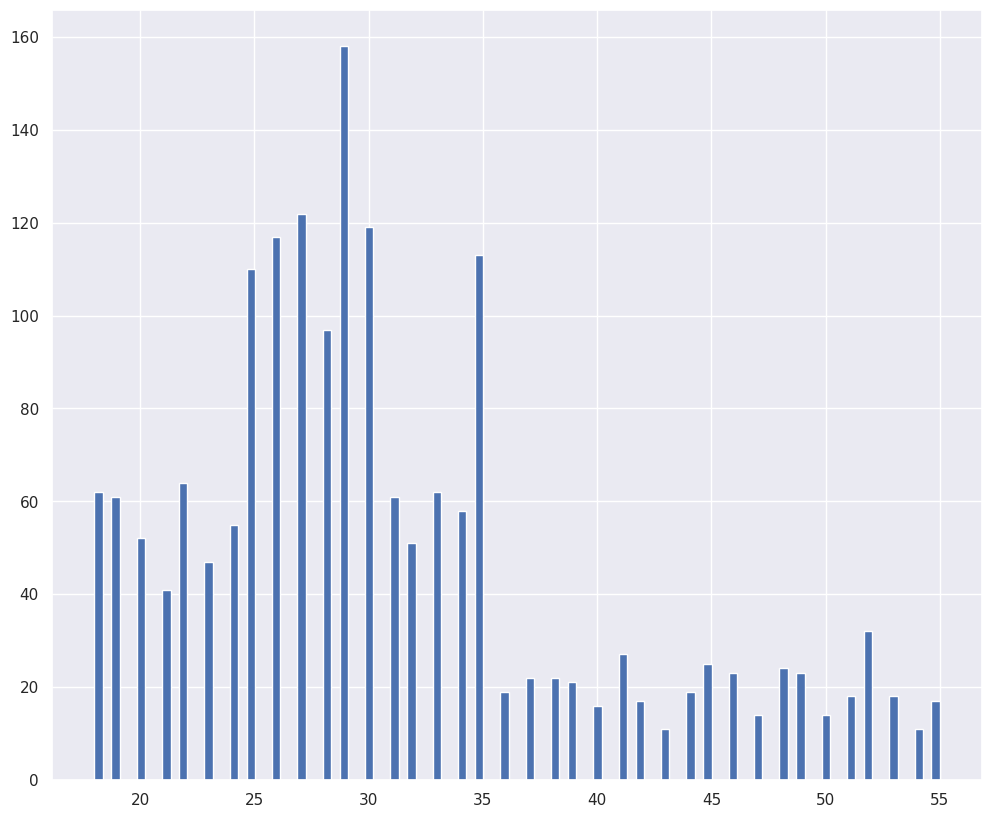

In [78]:
Data['Edad '].hist(bins=100)

El cumplimiento de las tareas por parte de los empleados es medido a través de metodologia propia de la empresa. Se identifica que se encuentra segmentada en dos grupos, concentrando la mayoria de registros en el segundo grupo, el cual tiene un rango de 15 a 45 puntos.

<Axes: >

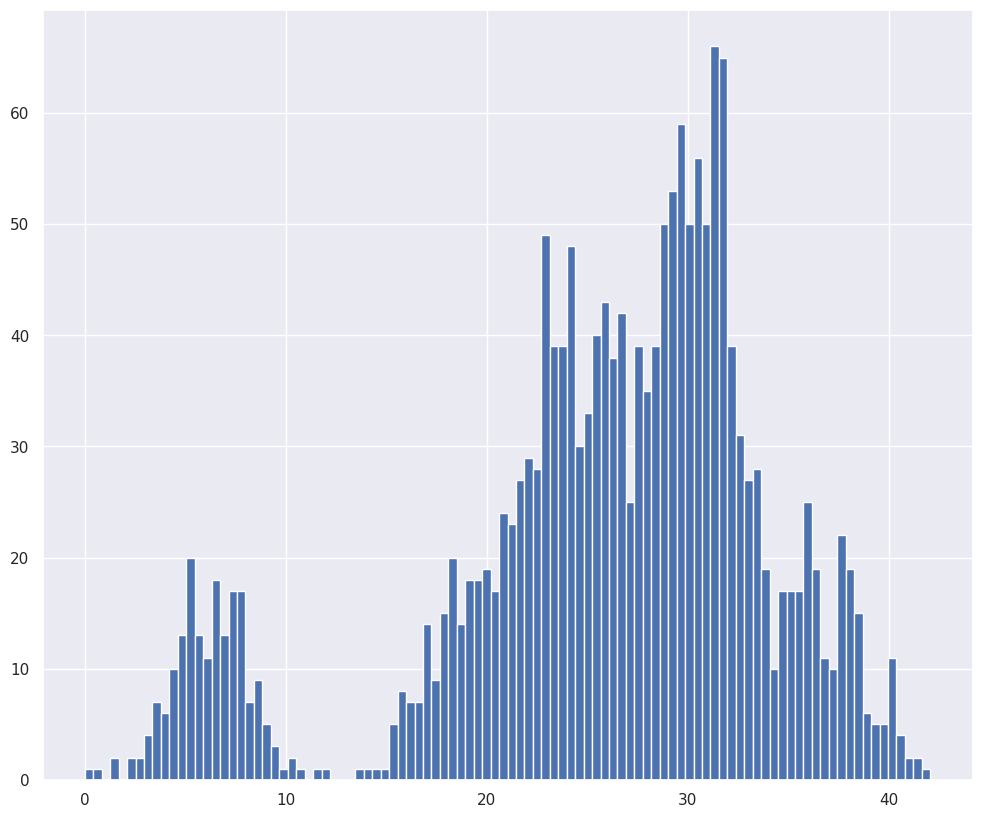

In [79]:
Data['Cumplimiento '].hist(bins=100)

La calidad de la gestión de los empleados es medido a través de metodologia propia de la empresa. Se identifica que se encuentra segmentada en dos grupos, concentrando la mayoria de registros en el segundo grupo, el cual tiene un rango de 18 a 30 puntos. 

<Axes: >

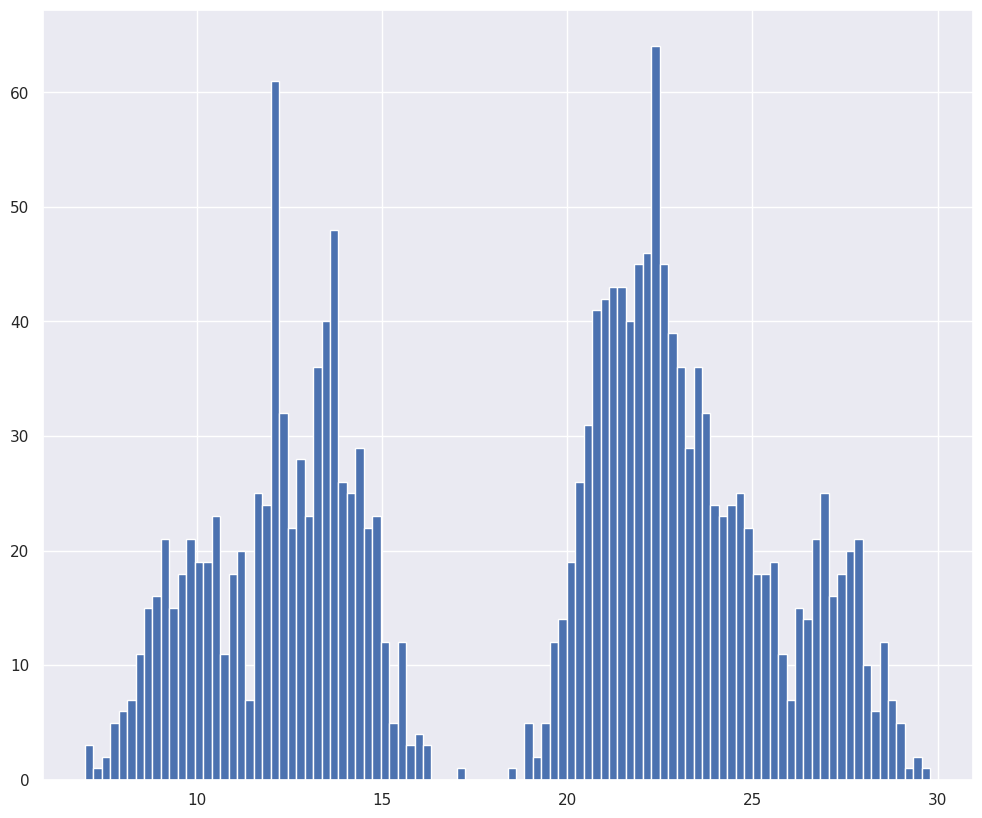

In [80]:
Data['Calidad'].hist(bins=100)

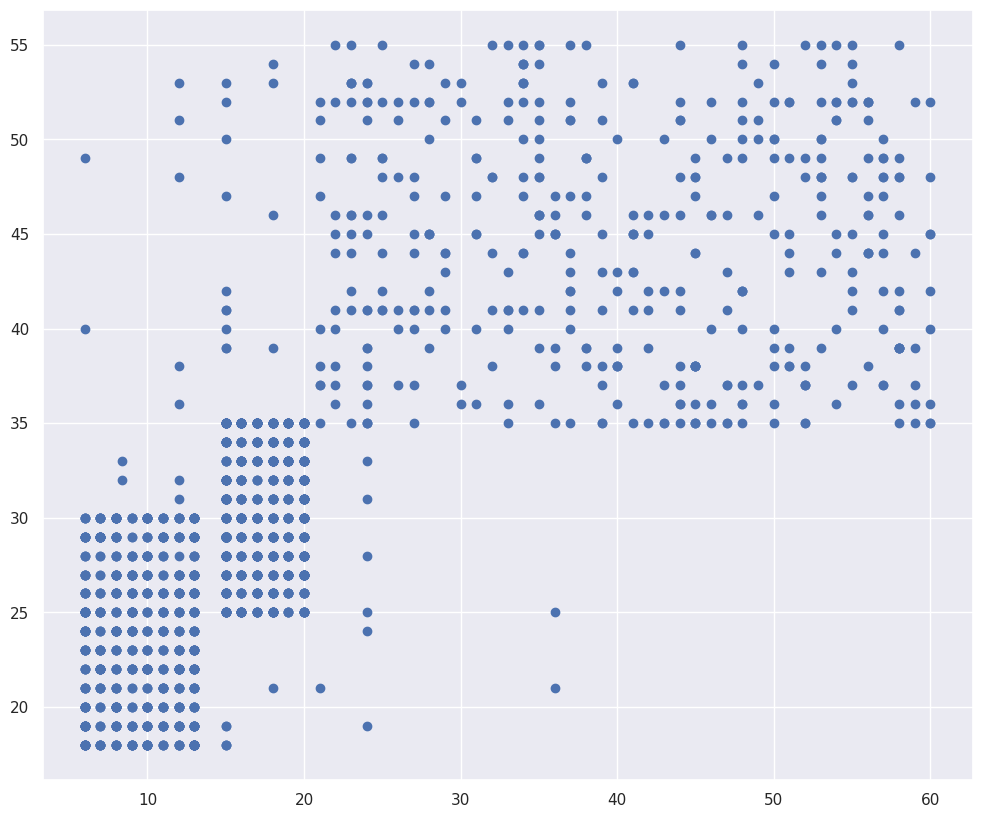

In [81]:
plt.scatter(Data[' Salario '], Data['Edad '])
plt.show()

Genero un grafico de dispersión con los atributos "Cumplimiento" y "Calidad".

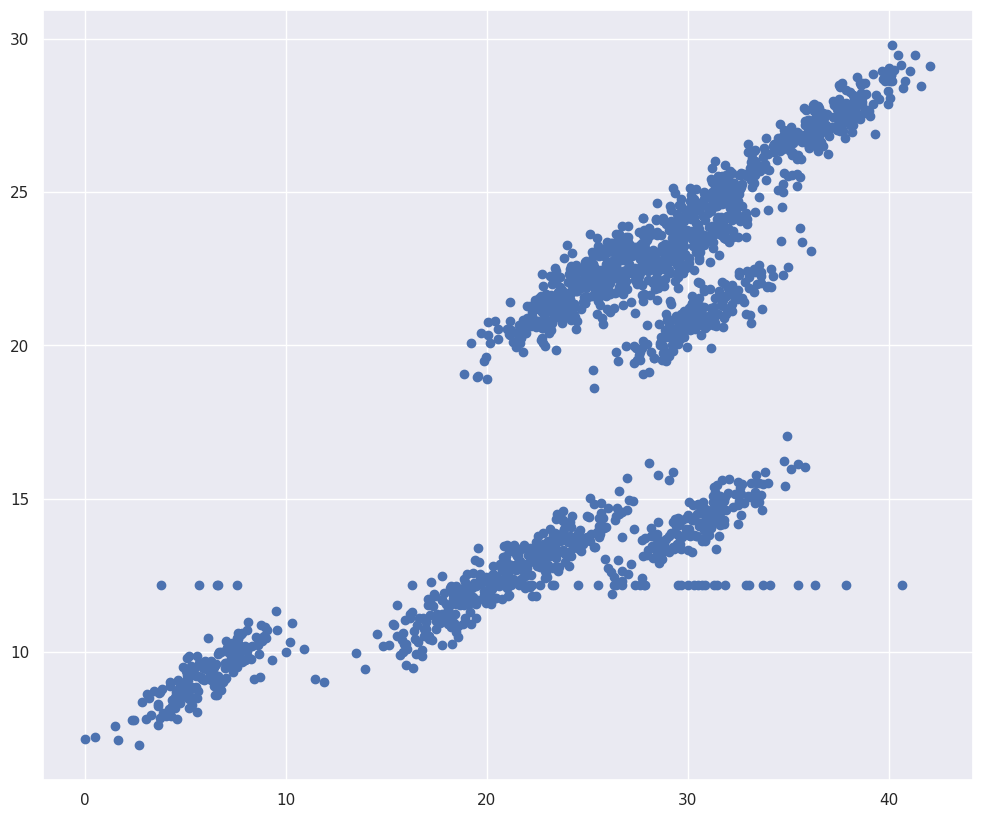

In [82]:
plt.scatter(Data['Cumplimiento '], Data['Calidad'])
plt.show()

Genero una matriz de graficos con los atributos categoricos "Genero" y "Nivel de Cargo" y el atributo numérico "Satisfacción".

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprec

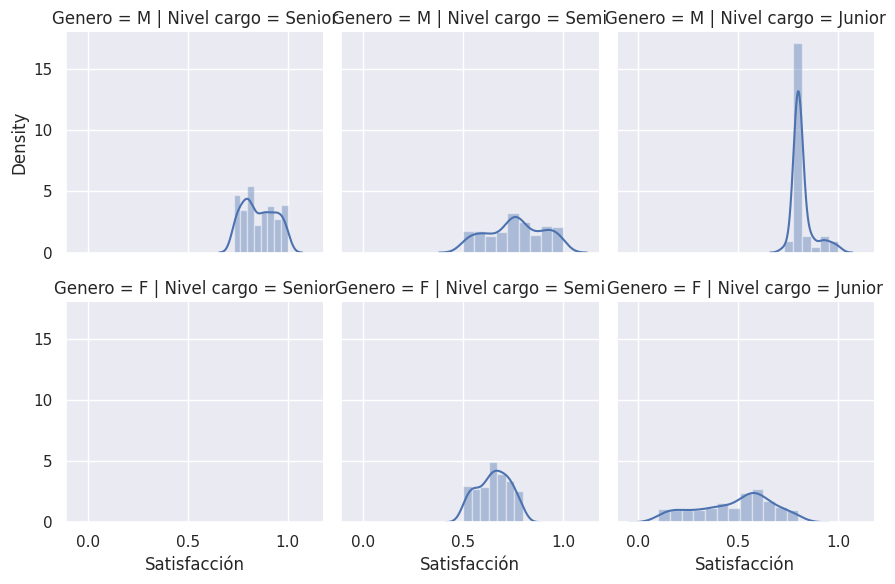

In [83]:
sns.set(font_scale=1)
g = sns.FacetGrid(Data, row='Genero',col='Nivel cargo')
g.map(sns.distplot, "Satisfacción")
plt.show()

Selecciono algunos atributos con los que voy a generar un matrtiz de gráficos de dispersión para ver el comportamiento de estos.

In [84]:
Feat = ['Cumplimiento ', 'Efectividad', 'Calidad',
       'Satisfacción', 'Productividad', 'Trabajo en equipo']
F = Data[Feat]
F.head()

Cumplimiento   Efectividad  Calidad  Satisfacción  Productividad  \
0          18.20         0.15    10.81          0.85           0.81   
1          31.75         0.07    25.45          0.74           0.83   
2          39.71         0.14    28.69          0.76           0.74   
3          23.23         0.06    13.20          0.75           0.82   
4           5.41         0.19     9.44          0.89           0.86   

   Trabajo en equipo  
0               0.48  
1               0.69  
2               0.52  
3               0.54  
4               0.50

Visualizo el gráfico generado para identificar los atributos que mejor se ajustan al analisis de desempeño (criterio experto). 

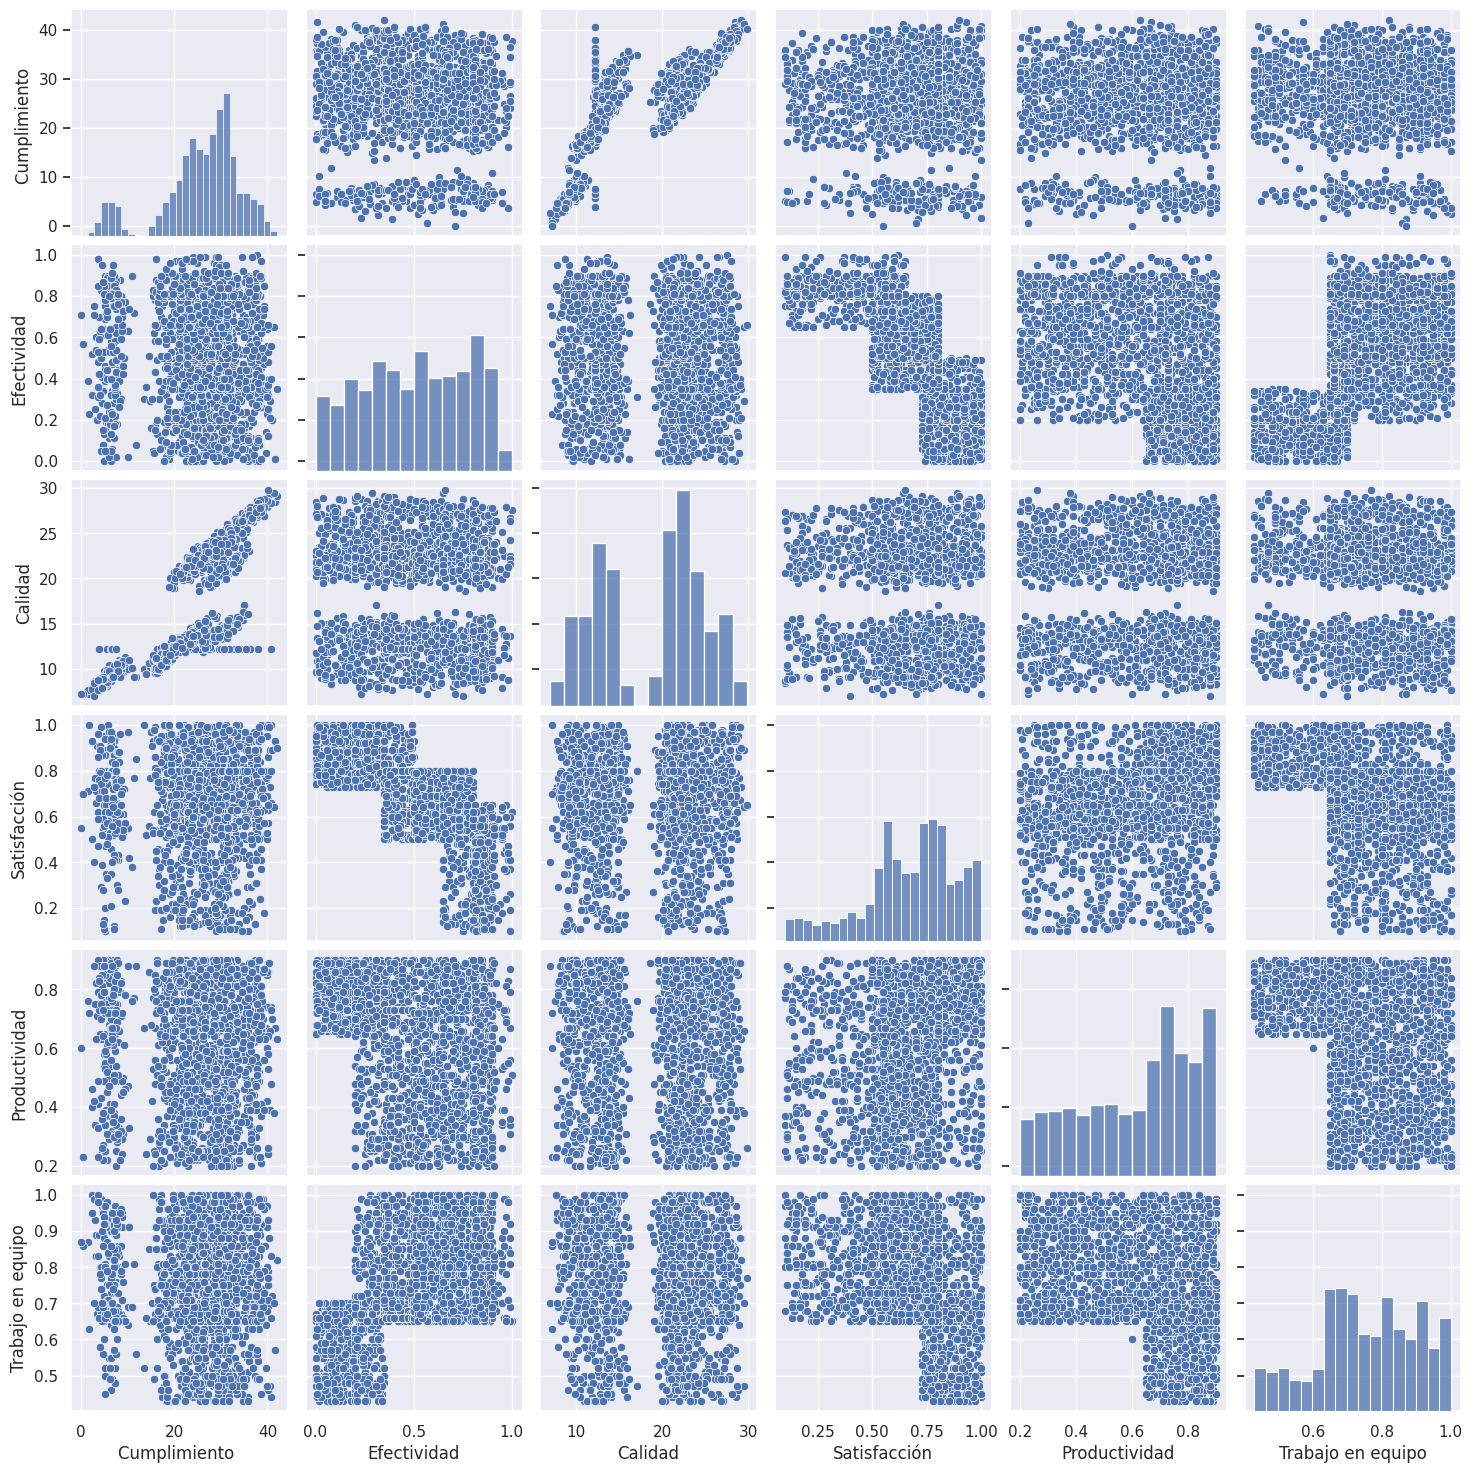

In [85]:
sns.pairplot(F)

## Feature selector

Analizo la importancia de los atributos que puede ser usados para este análisis

fs.identify_zero_importance(task = 'classification', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

zero_importance_features = fs.ops['zero_importance']
zero_importance_features[0:15]

fs.plot_feature_importances(threshold = 0.99, plot_n = 17)

fs.feature_importances.head(23)

Exporto la unión de los datasets en un archivo excel, para guardar una copia de seguridad de los datos consolidados.

In [86]:
Data.to_excel('D5.xlsx', index = False)

Realizo una matriz de correlación para ver la relación estadística entre los atributos del dataset consolidado.

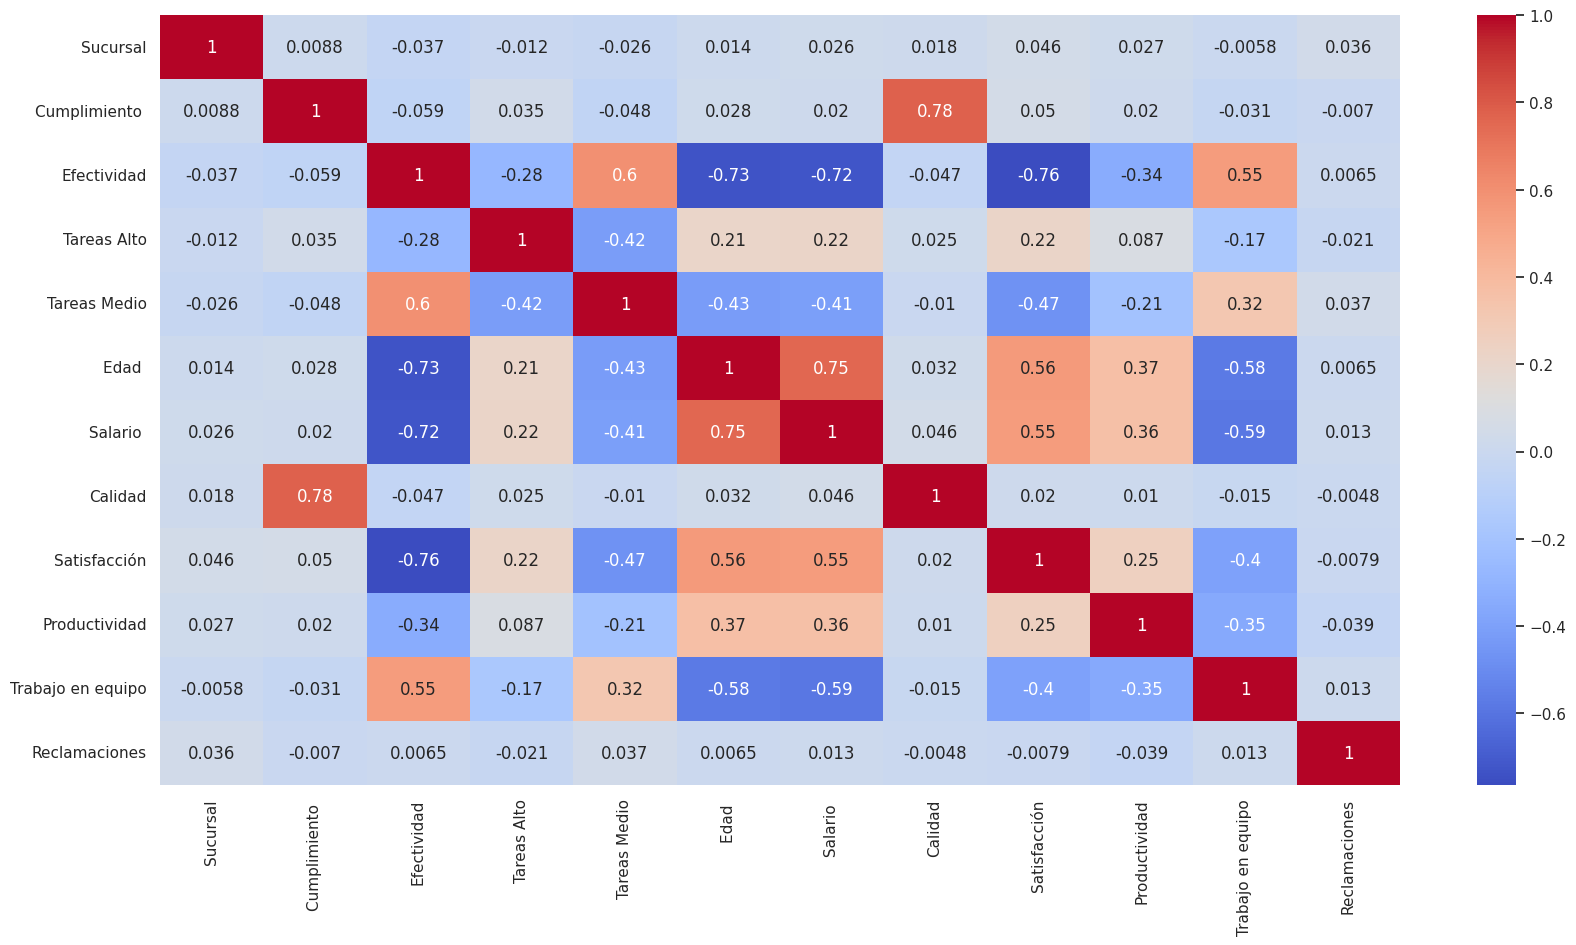

In [87]:
correlation_matrix = Data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Analizo los atributos que tienen una correlación lineal superior al 96%. 
Identifíco que no existen atributos que están altamente correlacionados. 

In [88]:
fs.identify_collinear(correlation_threshold=0.96)

0 features with a correlation magnitude greater than 0.96.



In [89]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

Empty DataFrame
Columns: [drop_feature, corr_feature, corr_value]
Index: []

Selecciono algunos atributos que no son relevantes para el analisis y los descarto.

In [90]:
Data=Data.drop(columns=['Cargo', 'Proyecto','Modalidad','Ciudad', 'Pais'], axis=1)
Data

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio Genero  \
0            2          18.20         0.15         0.85          0.06      M   
1            5          31.75         0.07         0.57          0.00      M   
2            5          39.71         0.14         0.65          0.11      M   
3            3          23.23         0.06         0.57          0.00      M   
4            4           5.41         0.19         0.55          0.11      M   
...        ...            ...          ...          ...           ...    ...   
1838         2          19.07         0.96         0.58          0.17      F   
1839         3          24.57         0.91         0.58          0.17      F   
1840         2           4.61         0.95         0.58          0.17      F   
1841         6          25.53         0.99         0.58          0.17      F   
1842         3          22.48         0.98         0.58          0.17      F   

     Nivel cargo  Edad    Salario   Calidad  Satisfacción  Productividad  \
0         Senior   45.0       60.0    10.81          0.85           0.81   
1         Senior   25.0       36.0    25.45          0.74           0.83   
2         Senior   45.0       36.0    28.69          0.76           0.74   
3         Senior   38.0       36.0    13.20          0.75           0.82   
4         Senior   46.0       36.0     9.44          0.89           0.86   
...          ...    ...        ...      ...           ...            ...   
1838      Junior   24.0        9.0    11.57          0.37           0.39   
1839      Junior   29.0        7.0    22.04          0.43           0.46   
1840      Junior   25.0       13.0     7.81          0.52           0.26   
1841      Junior   21.0       13.0    21.65          0.19           0.87   
1842      Junior   22.0       12.0    21.22          0.44           0.55   

      Trabajo en equipo  Reclamaciones  
0                  0.48             99  
1                  0.69             63  
2                  0.52             66  
3                  0.54             19  
4                  0.50             16  
...                 ...            ...  
1838               0.90             80  
1839               0.80             71  
1840               0.70             13  
1841               0.92             41  
1842               0.71             46  

[1843 rows x 14 columns]

Generó los atributos dummies para los atributos categoricos que aun quedan en el dataset, es decir  "Genero" y "Nivel de Cargo".

In [91]:
Data = pd.get_dummies(Data)
Data

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Edad   \
0            2          18.20         0.15         0.85          0.06   45.0   
1            5          31.75         0.07         0.57          0.00   25.0   
2            5          39.71         0.14         0.65          0.11   45.0   
3            3          23.23         0.06         0.57          0.00   38.0   
4            4           5.41         0.19         0.55          0.11   46.0   
...        ...            ...          ...          ...           ...    ...   
1838         2          19.07         0.96         0.58          0.17   24.0   
1839         3          24.57         0.91         0.58          0.17   29.0   
1840         2           4.61         0.95         0.58          0.17   25.0   
1841         6          25.53         0.99         0.58          0.17   21.0   
1842         3          22.48         0.98         0.58          0.17   22.0   

       Salario   Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          60.0    10.81          0.85           0.81               0.48   
1          36.0    25.45          0.74           0.83               0.69   
2          36.0    28.69          0.76           0.74               0.52   
3          36.0    13.20          0.75           0.82               0.54   
4          36.0     9.44          0.89           0.86               0.50   
...         ...      ...           ...            ...                ...   
1838        9.0    11.57          0.37           0.39               0.90   
1839        7.0    22.04          0.43           0.46               0.80   
1840       13.0     7.81          0.52           0.26               0.70   
1841       13.0    21.65          0.19           0.87               0.92   
1842       12.0    21.22          0.44           0.55               0.71   

      Reclamaciones  Genero_F  Genero_M  Nivel cargo_Junior  Nivel cargo_Semi  \
0                99         0         1                   0                 0   
1                63         0         1                   0                 0   
2                66         0         1                   0                 0   
3                19         0         1                   0                 0   
4                16         0         1                   0                 0   
...             ...       ...       ...                 ...               ...   
1838             80         1         0                   1                 0   
1839             71         1         0                   1                 0   
1840             13         1         0                   1                 0   
1841             41         1         0                   1                 0   
1842             46         1         0                   1                 0   

      Nivel cargo_Senior  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  ...  
1838                   0  
1839                   0  
1840                   0  
1841                   0  
1842                   0  

[1843 rows x 17 columns]

In [92]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sucursal            1843 non-null   int64  
 1   Cumplimiento        1843 non-null   float64
 2   Efectividad         1843 non-null   float64
 3   Tareas Alto         1843 non-null   float64
 4   Tareas Medio        1843 non-null   float64
 5   Edad                1843 non-null   float64
 6    Salario            1843 non-null   float64
 7   Calidad             1843 non-null   float64
 8   Satisfacción        1843 non-null   float64
 9   Productividad       1843 non-null   float64
 10  Trabajo en equipo   1843 non-null   float64
 11  Reclamaciones       1843 non-null   int64  
 12  Genero_F            1843 non-null   uint8  
 13  Genero_M            1843 non-null   uint8  
 14  Nivel cargo_Junior  1843 non-null   uint8  
 15  Nivel cargo_Semi    1843 non-null   uint8  
 16  Nivel 

In [93]:
Data.shape

(1843, 17)

In [94]:
Data

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Edad   \
0            2          18.20         0.15         0.85          0.06   45.0   
1            5          31.75         0.07         0.57          0.00   25.0   
2            5          39.71         0.14         0.65          0.11   45.0   
3            3          23.23         0.06         0.57          0.00   38.0   
4            4           5.41         0.19         0.55          0.11   46.0   
...        ...            ...          ...          ...           ...    ...   
1838         2          19.07         0.96         0.58          0.17   24.0   
1839         3          24.57         0.91         0.58          0.17   29.0   
1840         2           4.61         0.95         0.58          0.17   25.0   
1841         6          25.53         0.99         0.58          0.17   21.0   
1842         3          22.48         0.98         0.58          0.17   22.0   

       Salario   Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          60.0    10.81          0.85           0.81               0.48   
1          36.0    25.45          0.74           0.83               0.69   
2          36.0    28.69          0.76           0.74               0.52   
3          36.0    13.20          0.75           0.82               0.54   
4          36.0     9.44          0.89           0.86               0.50   
...         ...      ...           ...            ...                ...   
1838        9.0    11.57          0.37           0.39               0.90   
1839        7.0    22.04          0.43           0.46               0.80   
1840       13.0     7.81          0.52           0.26               0.70   
1841       13.0    21.65          0.19           0.87               0.92   
1842       12.0    21.22          0.44           0.55               0.71   

      Reclamaciones  Genero_F  Genero_M  Nivel cargo_Junior  Nivel cargo_Semi  \
0                99         0         1                   0                 0   
1                63         0         1                   0                 0   
2                66         0         1                   0                 0   
3                19         0         1                   0                 0   
4                16         0         1                   0                 0   
...             ...       ...       ...                 ...               ...   
1838             80         1         0                   1                 0   
1839             71         1         0                   1                 0   
1840             13         1         0                   1                 0   
1841             41         1         0                   1                 0   
1842             46         1         0                   1                 0   

      Nivel cargo_Senior  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  ...  
1838                   0  
1839                   0  
1840                   0  
1841                   0  
1842                   0  

[1843 rows x 17 columns]

Exporto el dataset clusterizado a excel para tener una copia de seguridad de los datos ya procesados. 

In [ ]:
nombre_archivo = 'datos2.xlsx'
Data_clustered.to_excel(nombre_archivo, index=False)

# 6. Clusterización Bivariable



Importo las librerias y modulos requeridos para trabajar con los datos.

In [95]:
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Valido las columnas que quedan en el dataset consolidado y visualizo las prmeras y utlimas filas de datos para ver su contenido.

In [96]:
Data.columns


Index(['Sucursal', 'Cumplimiento ', 'Efectividad', 'Tareas Alto',
       'Tareas Medio', 'Edad ', ' Salario ', 'Calidad', 'Satisfacción',
       'Productividad', 'Trabajo en equipo', 'Reclamaciones', 'Genero_F',
       'Genero_M', 'Nivel cargo_Junior', 'Nivel cargo_Semi',
       'Nivel cargo_Senior'],
      dtype='object')

In [97]:
Data

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Edad   \
0            2          18.20         0.15         0.85          0.06   45.0   
1            5          31.75         0.07         0.57          0.00   25.0   
2            5          39.71         0.14         0.65          0.11   45.0   
3            3          23.23         0.06         0.57          0.00   38.0   
4            4           5.41         0.19         0.55          0.11   46.0   
...        ...            ...          ...          ...           ...    ...   
1838         2          19.07         0.96         0.58          0.17   24.0   
1839         3          24.57         0.91         0.58          0.17   29.0   
1840         2           4.61         0.95         0.58          0.17   25.0   
1841         6          25.53         0.99         0.58          0.17   21.0   
1842         3          22.48         0.98         0.58          0.17   22.0   

       Salario   Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          60.0    10.81          0.85           0.81               0.48   
1          36.0    25.45          0.74           0.83               0.69   
2          36.0    28.69          0.76           0.74               0.52   
3          36.0    13.20          0.75           0.82               0.54   
4          36.0     9.44          0.89           0.86               0.50   
...         ...      ...           ...            ...                ...   
1838        9.0    11.57          0.37           0.39               0.90   
1839        7.0    22.04          0.43           0.46               0.80   
1840       13.0     7.81          0.52           0.26               0.70   
1841       13.0    21.65          0.19           0.87               0.92   
1842       12.0    21.22          0.44           0.55               0.71   

      Reclamaciones  Genero_F  Genero_M  Nivel cargo_Junior  Nivel cargo_Semi  \
0                99         0         1                   0                 0   
1                63         0         1                   0                 0   
2                66         0         1                   0                 0   
3                19         0         1                   0                 0   
4                16         0         1                   0                 0   
...             ...       ...       ...                 ...               ...   
1838             80         1         0                   1                 0   
1839             71         1         0                   1                 0   
1840             13         1         0                   1                 0   
1841             41         1         0                   1                 0   
1842             46         1         0                   1                 0   

      Nivel cargo_Senior  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  ...  
1838                   0  
1839                   0  
1840                   0  
1841                   0  
1842                   0  

[1843 rows x 17 columns]

In [98]:
Data.isnull().sum()

Sucursal              0
Cumplimiento          0
Efectividad           0
Tareas Alto           0
Tareas Medio          0
Edad                  0
 Salario              0
Calidad               0
Satisfacción          0
Productividad         0
Trabajo en equipo     0
Reclamaciones         0
Genero_F              0
Genero_M              0
Nivel cargo_Junior    0
Nivel cargo_Semi      0
Nivel cargo_Senior    0
dtype: int64

Aplico la prueba del codo para definir el numero de clusters adecuados para llevar a cabo el analisis de desempeño. 

In [99]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(Data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

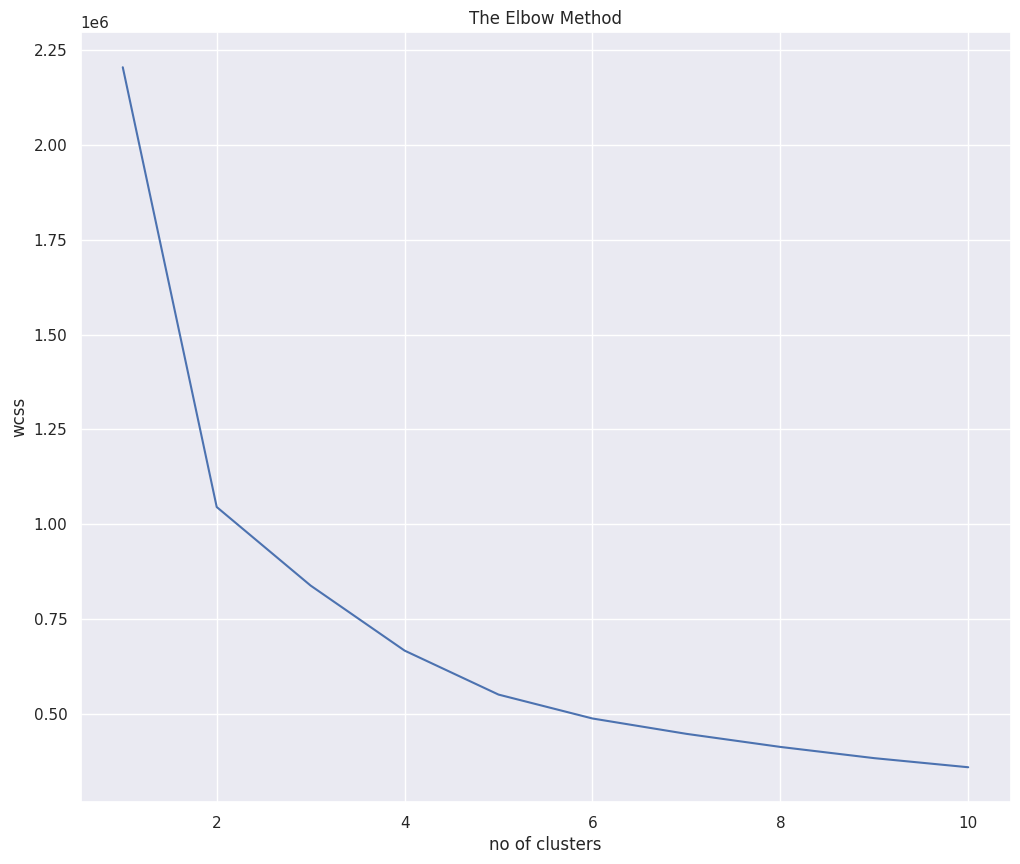

In [100]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Se identifica que se podrian tomar entre 2 a 4 clusters como la mejor opcion para realizar el analisis. De acuerdo a la definición del negocio se definió que se generen 3 clusters, es decir 3 categorias de desempeño.

Selecciono los atributos "Cumplimiento" y "Calidad". ya que considero que son los atributos adecuados para generar la clusterización de los empleados (Criterio experto).

In [101]:
Feat2 = ['Cumplimiento ', 'Calidad']
X= Data[Feat2]
X.head()

Cumplimiento   Calidad
0          18.20    10.81
1          31.75    25.45
2          39.71    28.69
3          23.23    13.20
4           5.41     9.44

Genero un grafico de dispersión con los atributos "Cumplimiento" y "Calidad".

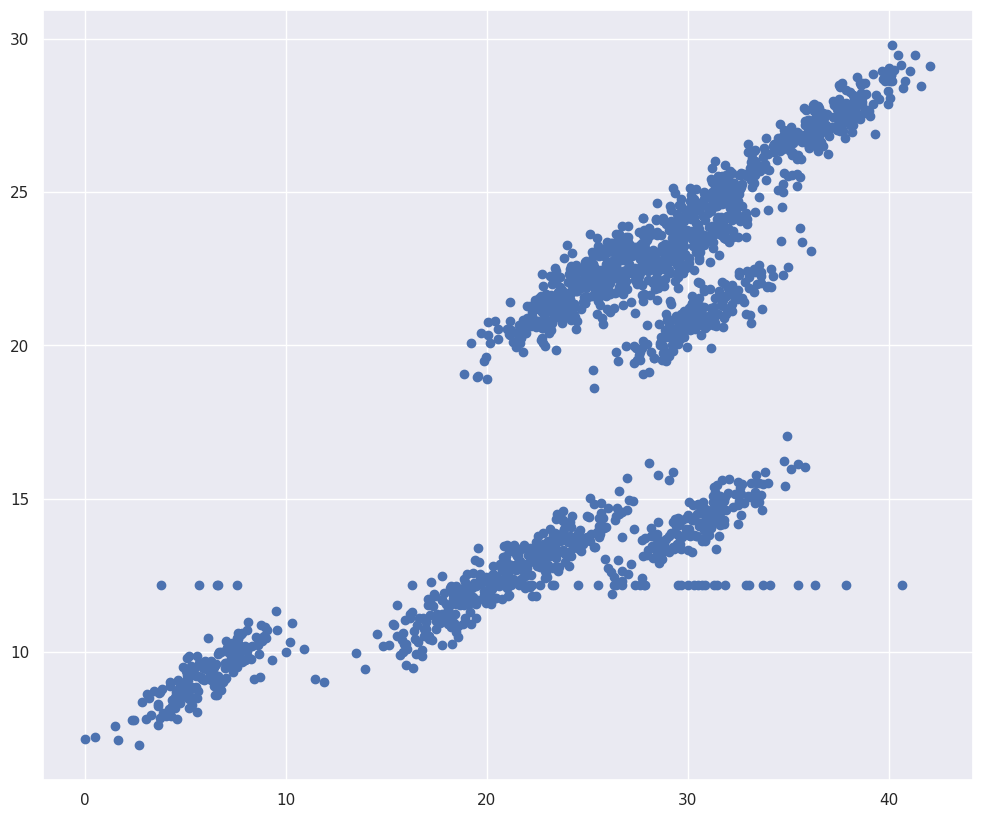

In [102]:
plt.scatter(X['Cumplimiento '], X['Calidad'])
plt.show()

## Clustering jerárquico aglomerativo

Implemento clústering jerárquico aglomerativo como primer modelo, en el cual parto de las variables que considero mas interesante para trabajar segun lo visto previamente.

Visualizo el comportamiento de los datos poder comprender bien el funcionamiento del clustering jerárquico.

A partir de este punto realizó el clustering utilizando la metrica de distancia euclidea con el metodo "average" que evalua la disimilitud media.

In [103]:
Z = linkage(X, method="average", metric="euclidean")

In [104]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(X))
print(c)

0.8405475401681172


La función "linkage" utiliza el método y métrica para calcular las distancias entre los clusters y en cada iteración mezclará los dos clusters con la distancia más pequeña de acuerdo al método y distancia elegidos.

In [105]:
Z[0]

array([1034., 1453.,    0.,    2.])

Vamos a ver las 20 primeras operaciones:

In [106]:
Z[:20]

array([[1.03400000e+03, 1.45300000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.58000000e+02, 9.86000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.39000000e+02, 9.93000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.97000000e+02, 7.38000000e+02, 1.00000000e-02, 2.00000000e+00],
       [2.80000000e+02, 7.07000000e+02, 1.00000000e-02, 2.00000000e+00],
       [1.45600000e+03, 1.75100000e+03, 1.00000000e-02, 2.00000000e+00],
       [9.11000000e+02, 1.80000000e+03, 1.00000000e-02, 2.00000000e+00],
       [1.03700000e+03, 1.15800000e+03, 1.00000000e-02, 2.00000000e+00],
       [8.21000000e+02, 1.10500000e+03, 1.00000000e-02, 2.00000000e+00],
       [3.89000000e+02, 1.84300000e+03, 1.41421356e-02, 3.00000000e+00],
       [7.71000000e+02, 8.56000000e+02, 1.41421356e-02, 2.00000000e+00],
       [7.24000000e+02, 1.24900000e+03, 1.41421356e-02, 2.00000000e+00],
       [4.57000000e+02, 1.10700000e+03, 1.41421356e-02, 2.00000000e+00],
       [2.34000000e+02, 1.68500000e+03, 1.41421356e

Vamos ahora a ver el dendograma:

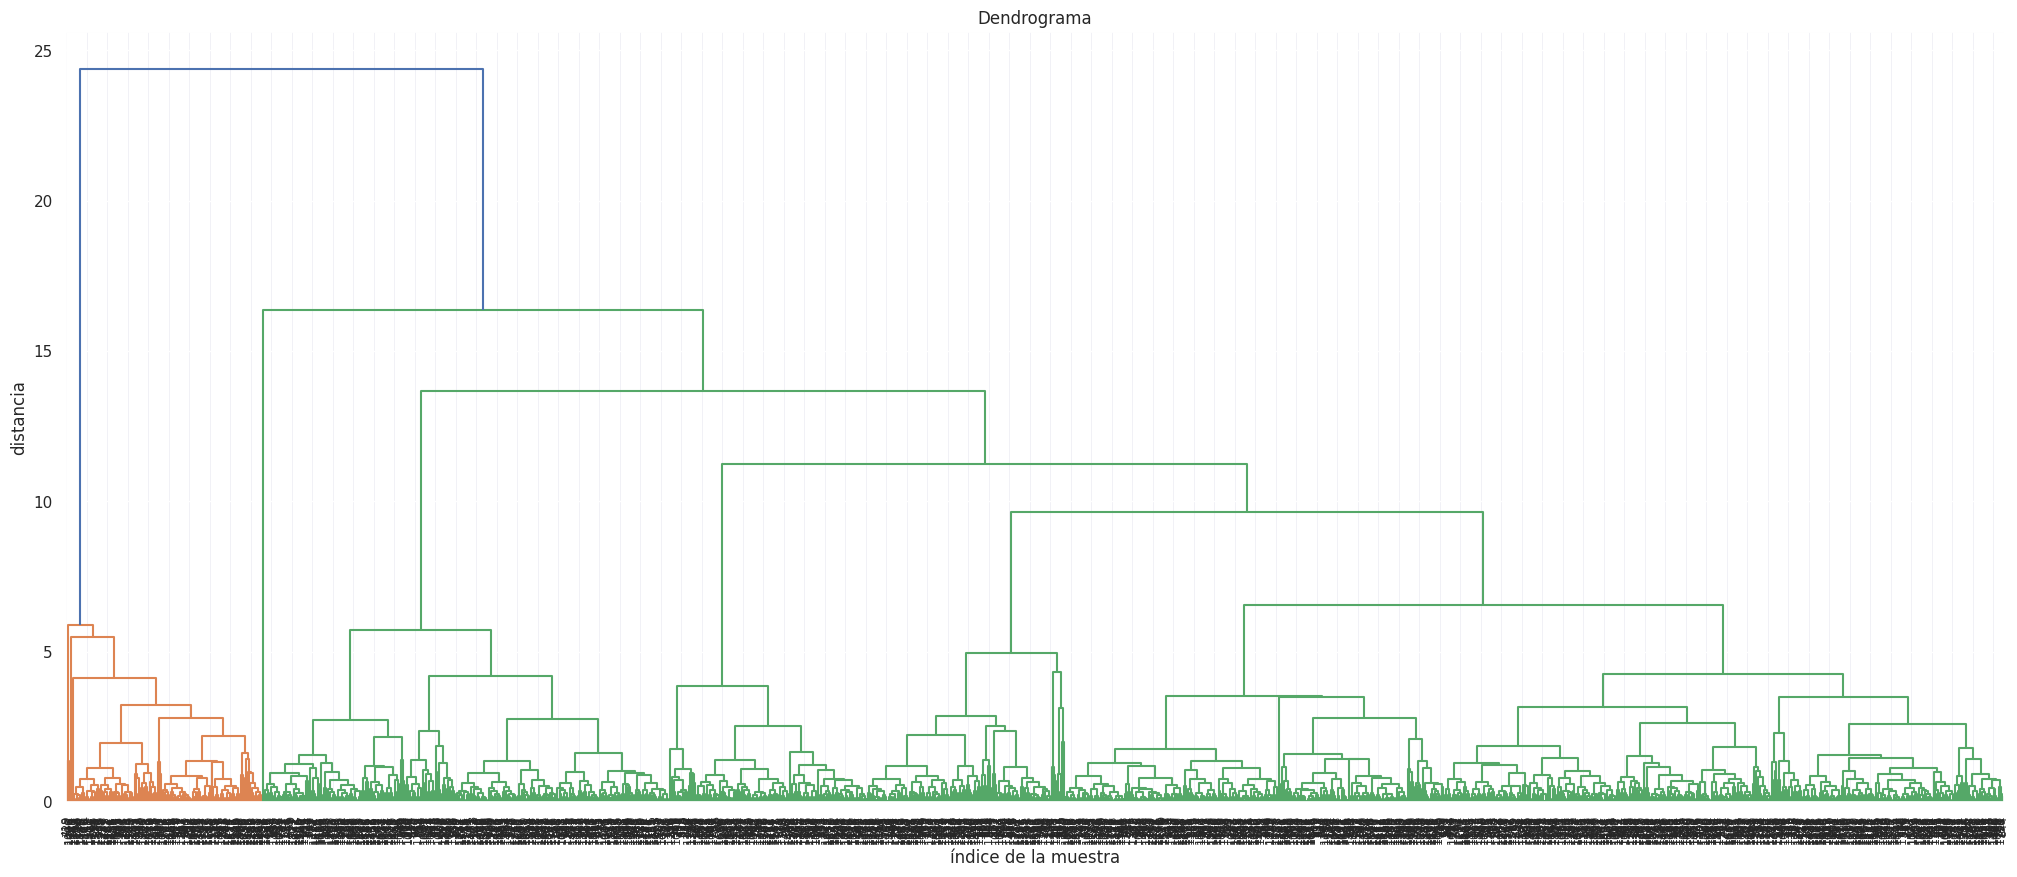

In [107]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Resumiendo el dendograma:

 -   Las lineas horizontales son uniones de clusters
 -   Las líneas verticales nos indican que clústers son parte de cada unión
 -   Las alturas de las líneas verticales nos indican la distancia que se "cubrió" al hacer la unión

 Además, el dendograma nos permite hacer cosas bastante útiles:

Visualizo la agrupación de los clusters con la respectiva cantidad de registros e identifico que se generan 3 clusters a partir de una distancia de 12 (no tenemos en cuenta el outlier identificado), por lo cual ese valor sera el punto de corte.

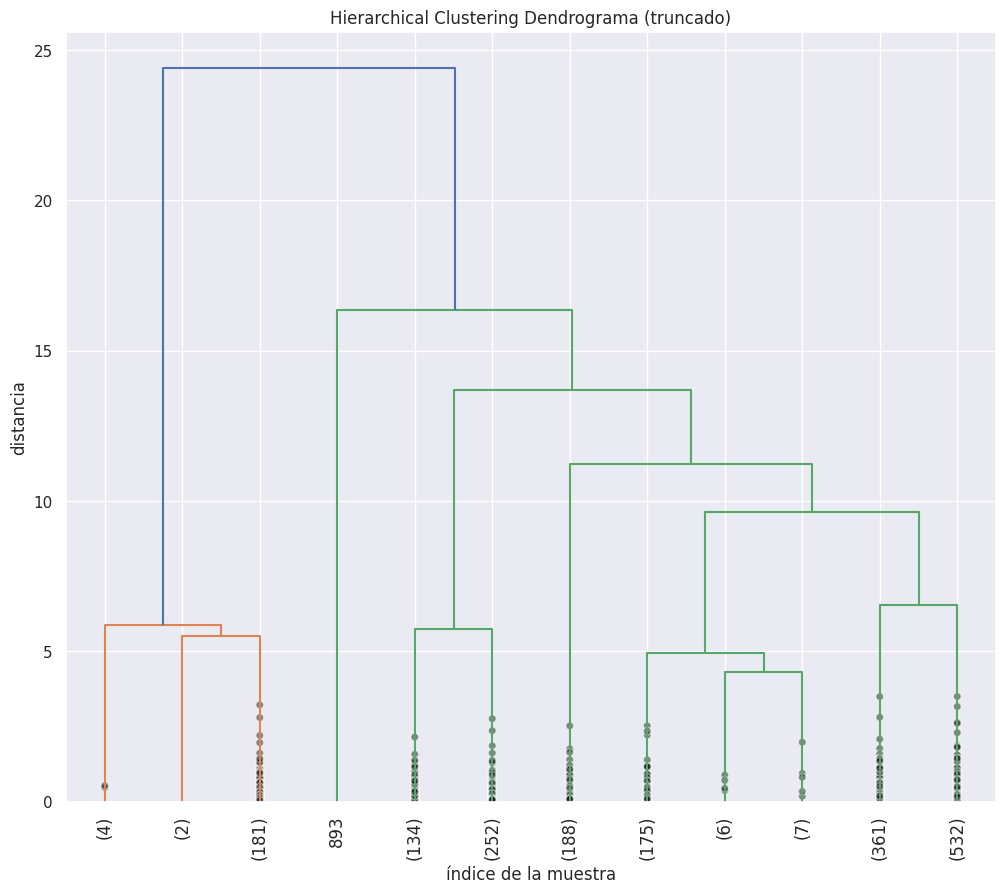

In [108]:
# quedarnos con las últimas p uniones
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=12,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Esta función calculo la distancia existente entre los clusters generados. 

In [109]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

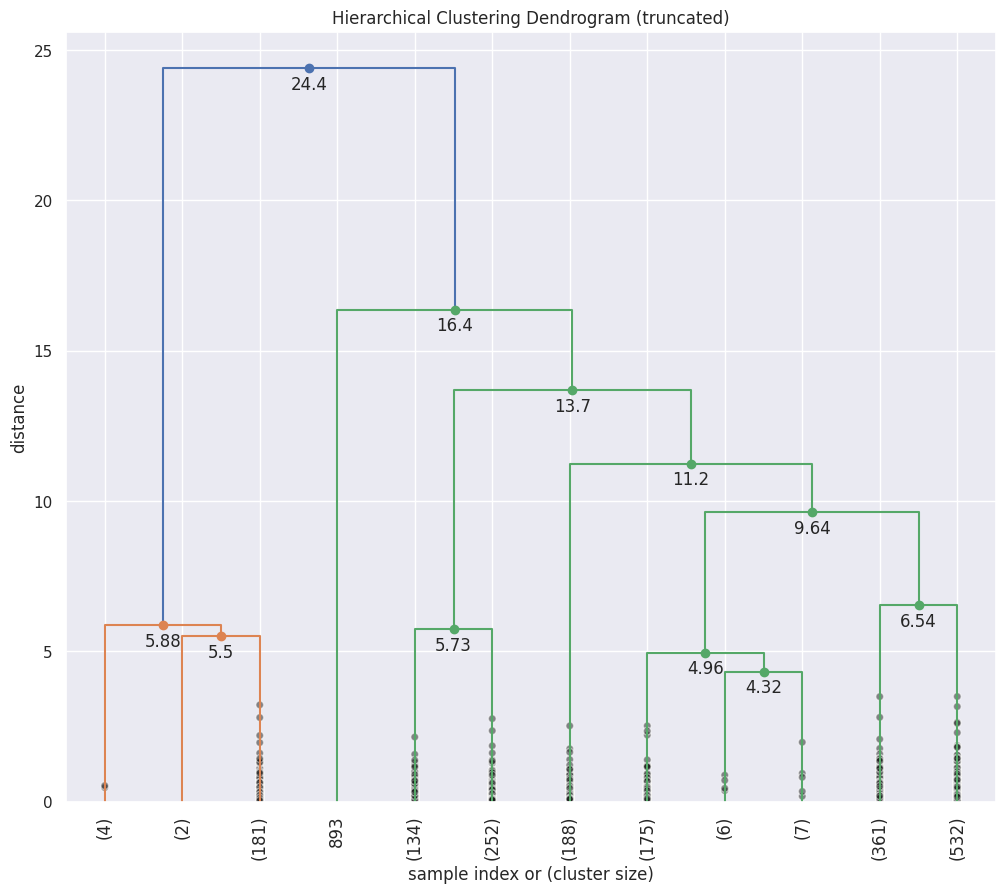

In [110]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

Defino el punto de de corte

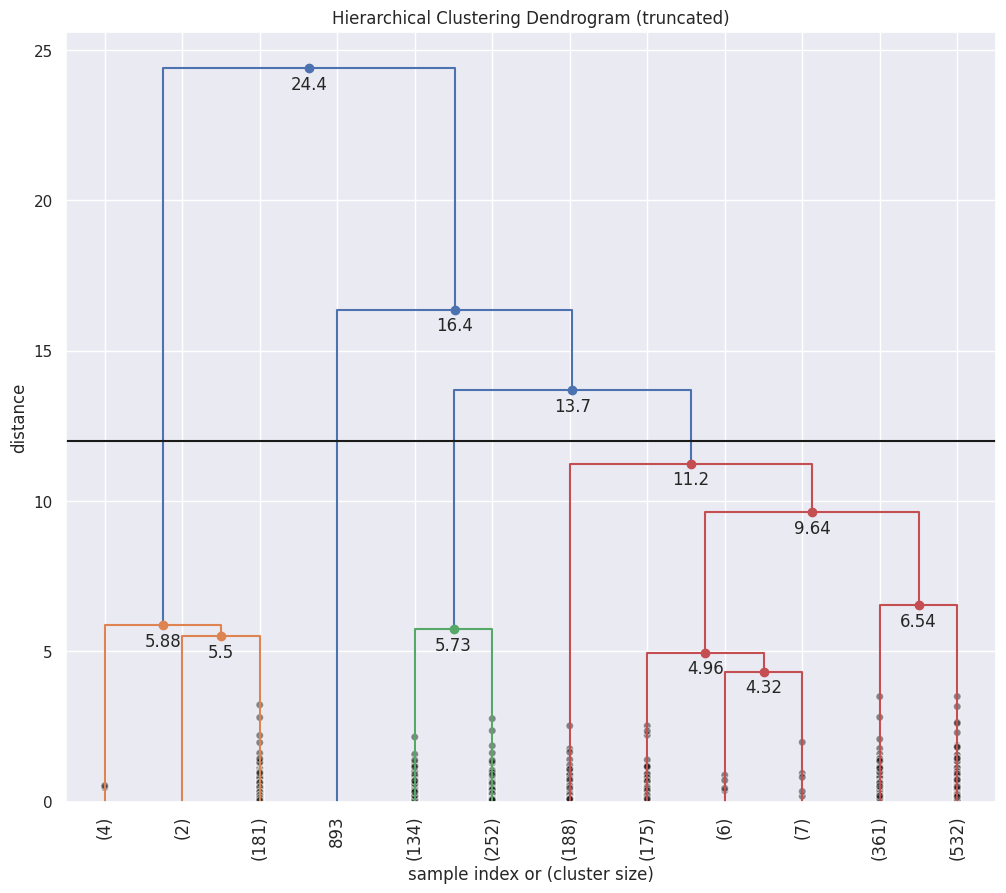

In [111]:
d_max = 12


fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

Genero otra visualización interesante, la cual es un "clustermap" de seaborn. 

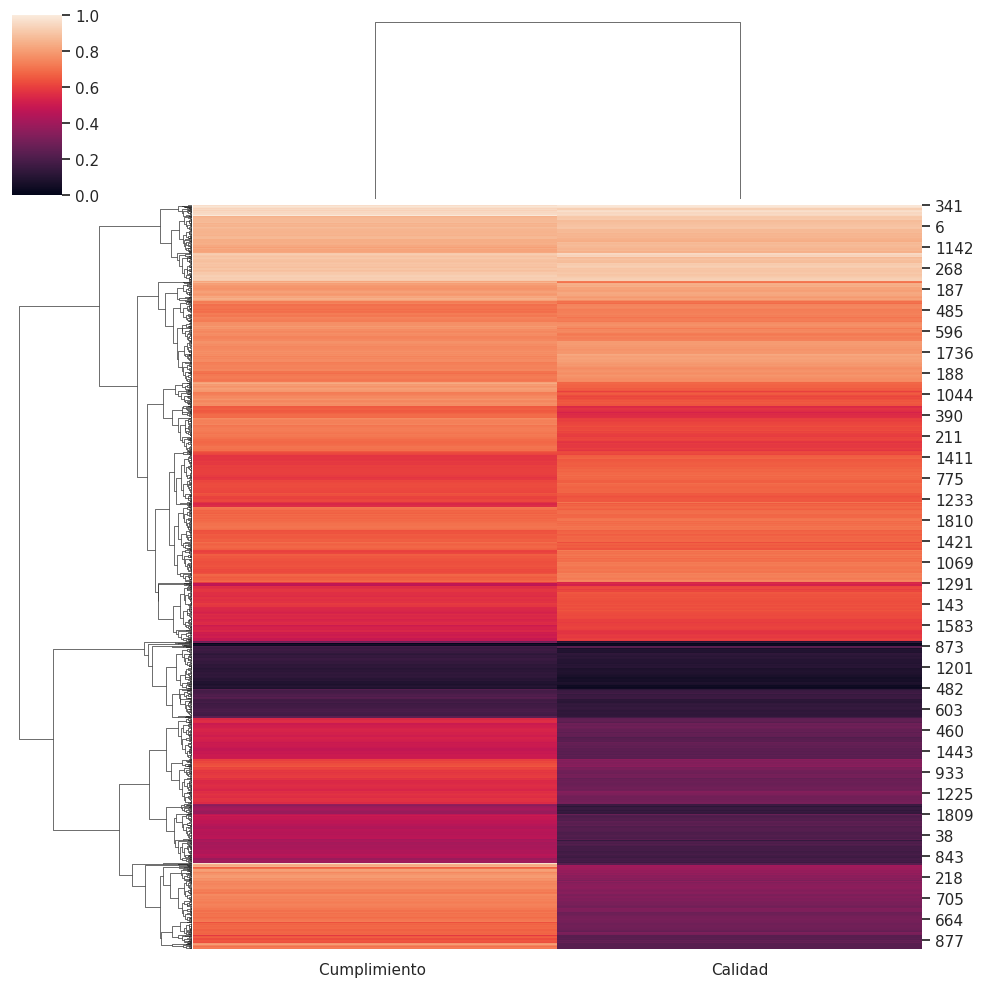

In [112]:
import seaborn as sns
sns.set(color_codes=True)
sns.clustermap(X, standard_scale=1)

## K- means

Importo las librerias y modulos requeridos para trabajar con los datos.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Realizó el proceso de estandarización de los datos, con el fin de que todos los atributos tengan la misma escala.

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Es fundamental tener los datos en la misma escala para obtener un agrupamiento correcto.

In [115]:
X_scaled

array([[-0.89212574, -1.32580832],
       [ 0.71086687,  1.1226939 ],
       [ 1.65255108,  1.66457554],
       ...,
       [-2.49985043, -1.82755058],
       [-0.02497181,  0.48715371],
       [-0.38579302,  0.41523732]])

Clusterizo los datos usando el algoritmo K-means.



In [116]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Visualizo el resultado obtenido con los parametros asignados.


Text(0, 0.5, 'Feature 1')

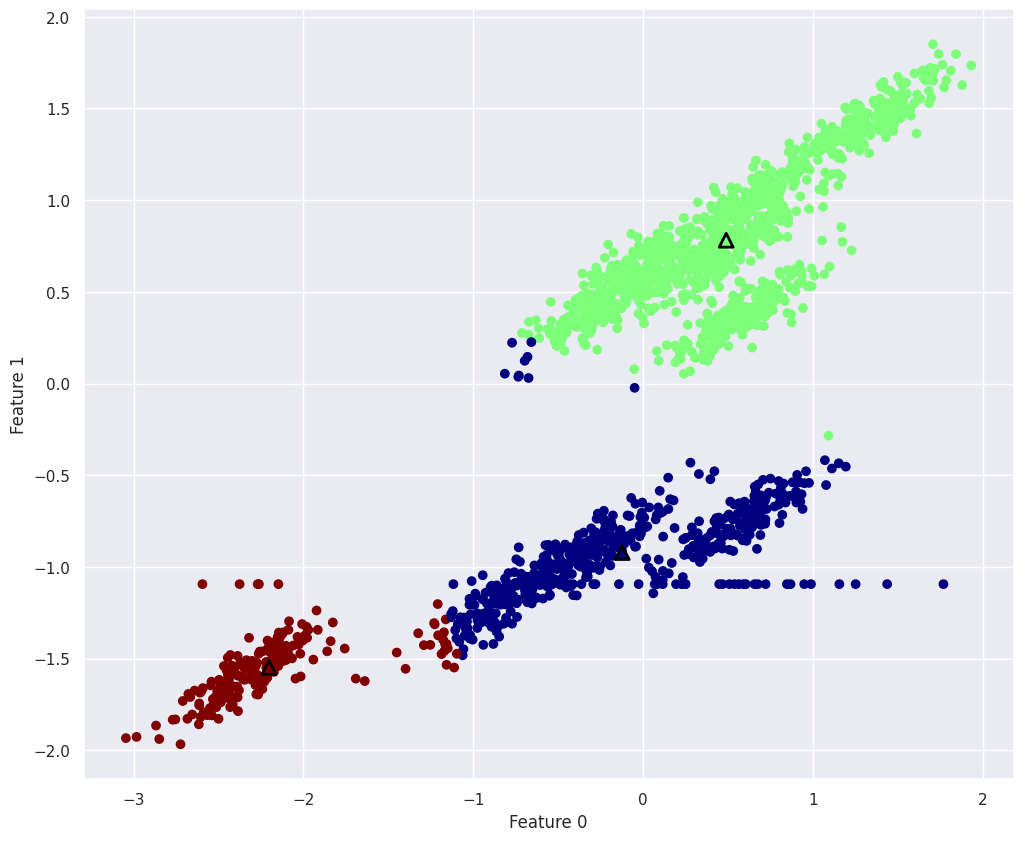

In [117]:
# plot the cluster assignments and cluster centers
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="jet")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2], 
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

El resultado obetnido no esta mal pero hay que tener en cuenta que el algoritmo K-means está diseñado para trabajar con la distancia Euclidea, no lidia bien con datos con una covarianza alta en los datos.

In [118]:
# Calcular la Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print("La Silhouette Score con K-Means es:", silhouette_avg)

La Silhouette Score con K-Means es: 0.5713101028540692


## DBSCAN

Importo las librerias y modulos requeridos para trabajar con los datos.

In [119]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Clusterizo los datos usando el algoritmo DBSCAN

In [120]:
# cluster the data into three clusters

dbscan = DBSCAN (eps= 0.12, min_samples= 5)
clusters = dbscan.fit_predict(X_scaled)

Visauzalizo el resultado obtenido con los parametros asignados.

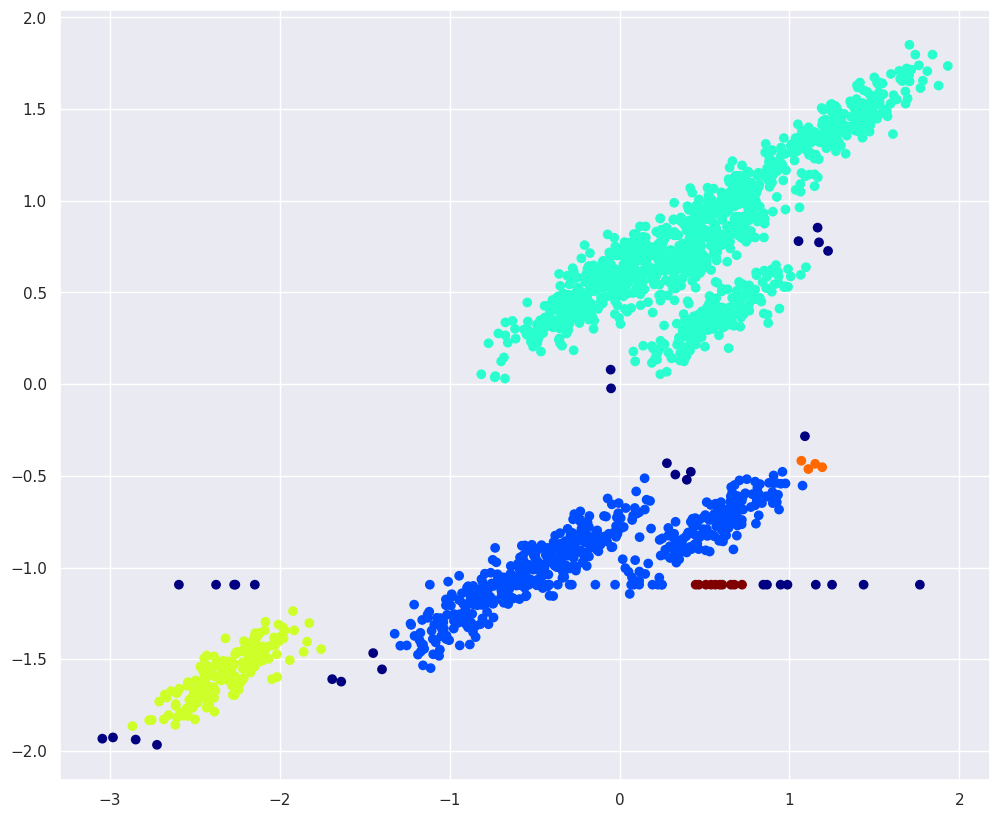

In [121]:
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='jet')

El resultado obtenido genera 3 clusters y además identifica unos cuantos outliers.

Para establcer que algoritmo de clusterización generó los mejores resultados, utilizo la metrica de Silueta para comparar cuantitativamente

In [122]:
# Calcular la Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("La Silhouette Score con DBSCAN es:", silhouette_avg)


La Silhouette Score con DBSCAN es: 0.34598844054420497


# 7. Clusterización PCA

Realizo en analisis de componentes principales (PCA) para reducir la dimensionalidad del conjunto de datos.

In [123]:
pca = PCA()
pca.fit(Data)
pca_2 = pca.transform(Data)

Genero la visualización correspondiente para ver el número de componentes adecuado para trabajar. 


Text(0.5, 1.0, 'PCA')

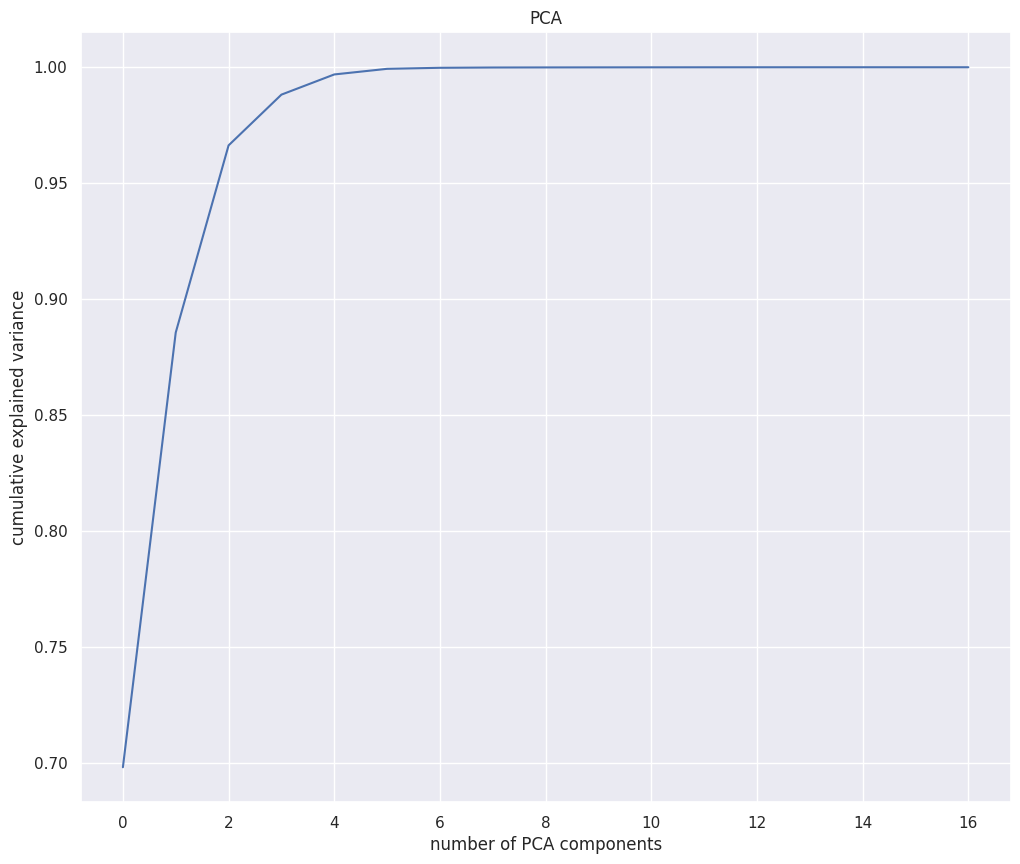

In [124]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of PCA components')
plt.ylabel('cumulative explained variance');
plt.title('PCA')

Como resultado del analisis de componentes (PCA), se define utilizar 3 componentes que representen el datset consolidado. 

Escalo los datos para realizar la PCA

In [125]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Data)
data_scaled

array([[-0.88239329, -0.89212574, -1.32947431, ..., -0.8209341 ,
        -0.7735883 ,  1.86659715],
       [ 0.87761843,  0.71086687, -1.63003658, ..., -0.8209341 ,
        -0.7735883 ,  1.86659715],
       [ 0.87761843,  1.65255108, -1.3670446 , ..., -0.8209341 ,
        -0.7735883 ,  1.86659715],
       ...,
       [-0.88239329, -2.49985043,  1.67614834, ...,  1.21812458,
        -0.7735883 , -0.53573424],
       [ 1.46428901, -0.02497181,  1.82642948, ...,  1.21812458,
        -0.7735883 , -0.53573424],
       [-0.29572271, -0.38579302,  1.78885919, ...,  1.21812458,
        -0.7735883 , -0.53573424]])

Realizo la PCA y declaro los 3 componentes a utilizar

In [126]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])

Valido el datset que contienen los 3 componentes generados a través del analisis de componentes principales (PCA).

In [127]:
df_pca

PC1       PC2       PC3
0     4.679885 -2.200333  1.474297
1     3.126990 -0.660686 -1.286753
2     3.615262 -1.320838 -2.423571
3     3.771837 -1.464643  0.829881
4     3.607722 -2.147303  2.671202
...        ...       ...       ...
1838 -3.527674 -0.668998  1.236194
1839 -2.959659 -0.787863 -0.486943
1840 -2.992779 -1.135715  2.849693
1841 -3.385820 -1.142780 -0.646593
1842 -2.952977 -1.091356 -0.264612

[1843 rows x 3 columns]

Genero la visualización de los 3 componentes definidos en un grafico 3D.

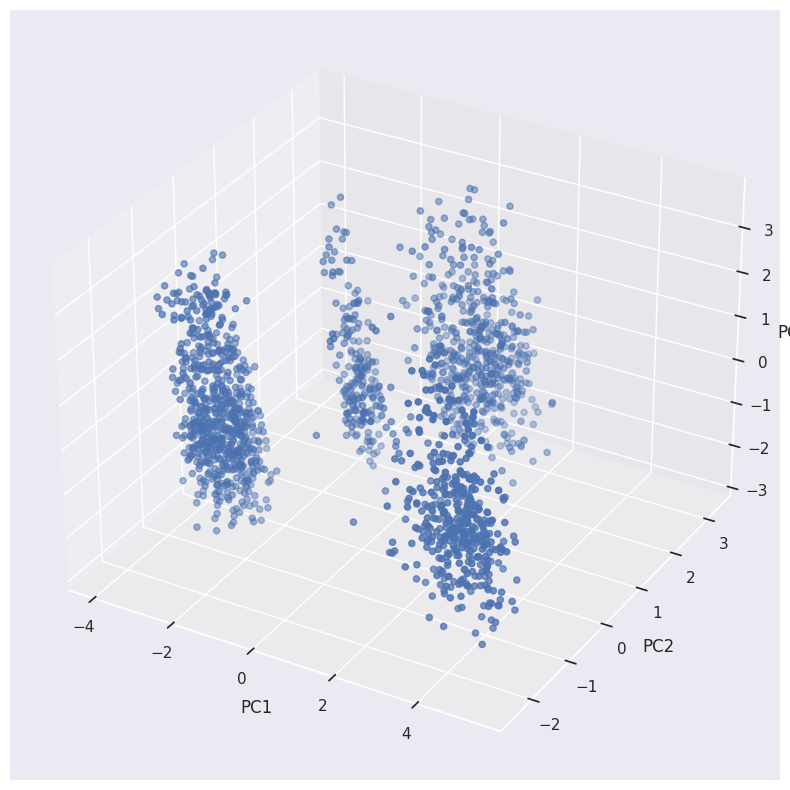

In [128]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


## Clustering jerárquico aglomerativo

Implemento clústering jerárquico aglomerativo como primer modelo, en el cual parto de las variables que considero mas interesante para trabajar segun lo visto previamente.

Visualizo el comportamiento de los datos poder comprender bien el funcionamiento del clustering jerárquico.

A partir de este punto realizó el clustering utilizando la metrica de distancia euclidea con el metodo "average" que evalua la disimilitud media.

In [129]:
Z = linkage(df_pca, method="average", metric="euclidean")

In [130]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(df_pca))
print(c)

0.8430703644235985


La función "linkage" utiliza el método y métrica para calcular las distancias entre los clusters y en cada iteración mezclará los dos clusters con la distancia más pequeña de acuerdo al método y distancia elegidos.

In [131]:
Z[0]

array([3.36000000e+02, 3.61000000e+02, 1.12686732e-02, 2.00000000e+00])

Vamos a ver las 20 primeras operaciones:

In [132]:
Z[:20]

array([[3.36000000e+02, 3.61000000e+02, 1.12686732e-02, 2.00000000e+00],
       [1.70000000e+02, 1.97000000e+02, 1.55718934e-02, 2.00000000e+00],
       [1.43800000e+03, 1.47900000e+03, 1.90685092e-02, 2.00000000e+00],
       [8.83000000e+02, 8.91000000e+02, 2.37225341e-02, 2.00000000e+00],
       [1.48500000e+03, 1.72200000e+03, 2.41151014e-02, 2.00000000e+00],
       [1.16000000e+03, 1.35300000e+03, 2.45502536e-02, 2.00000000e+00],
       [5.21000000e+02, 8.00000000e+02, 2.94167775e-02, 2.00000000e+00],
       [2.33000000e+02, 4.16000000e+02, 2.94200692e-02, 2.00000000e+00],
       [8.04000000e+02, 9.63000000e+02, 3.05681657e-02, 2.00000000e+00],
       [4.81000000e+02, 8.33000000e+02, 3.09637213e-02, 2.00000000e+00],
       [1.23200000e+03, 1.33600000e+03, 3.30381134e-02, 2.00000000e+00],
       [1.76300000e+03, 1.79900000e+03, 3.50523481e-02, 2.00000000e+00],
       [1.22300000e+03, 1.33500000e+03, 3.53914579e-02, 2.00000000e+00],
       [1.31500000e+03, 1.69800000e+03, 3.64749729e

Vamos ahora a ver el dendograma:

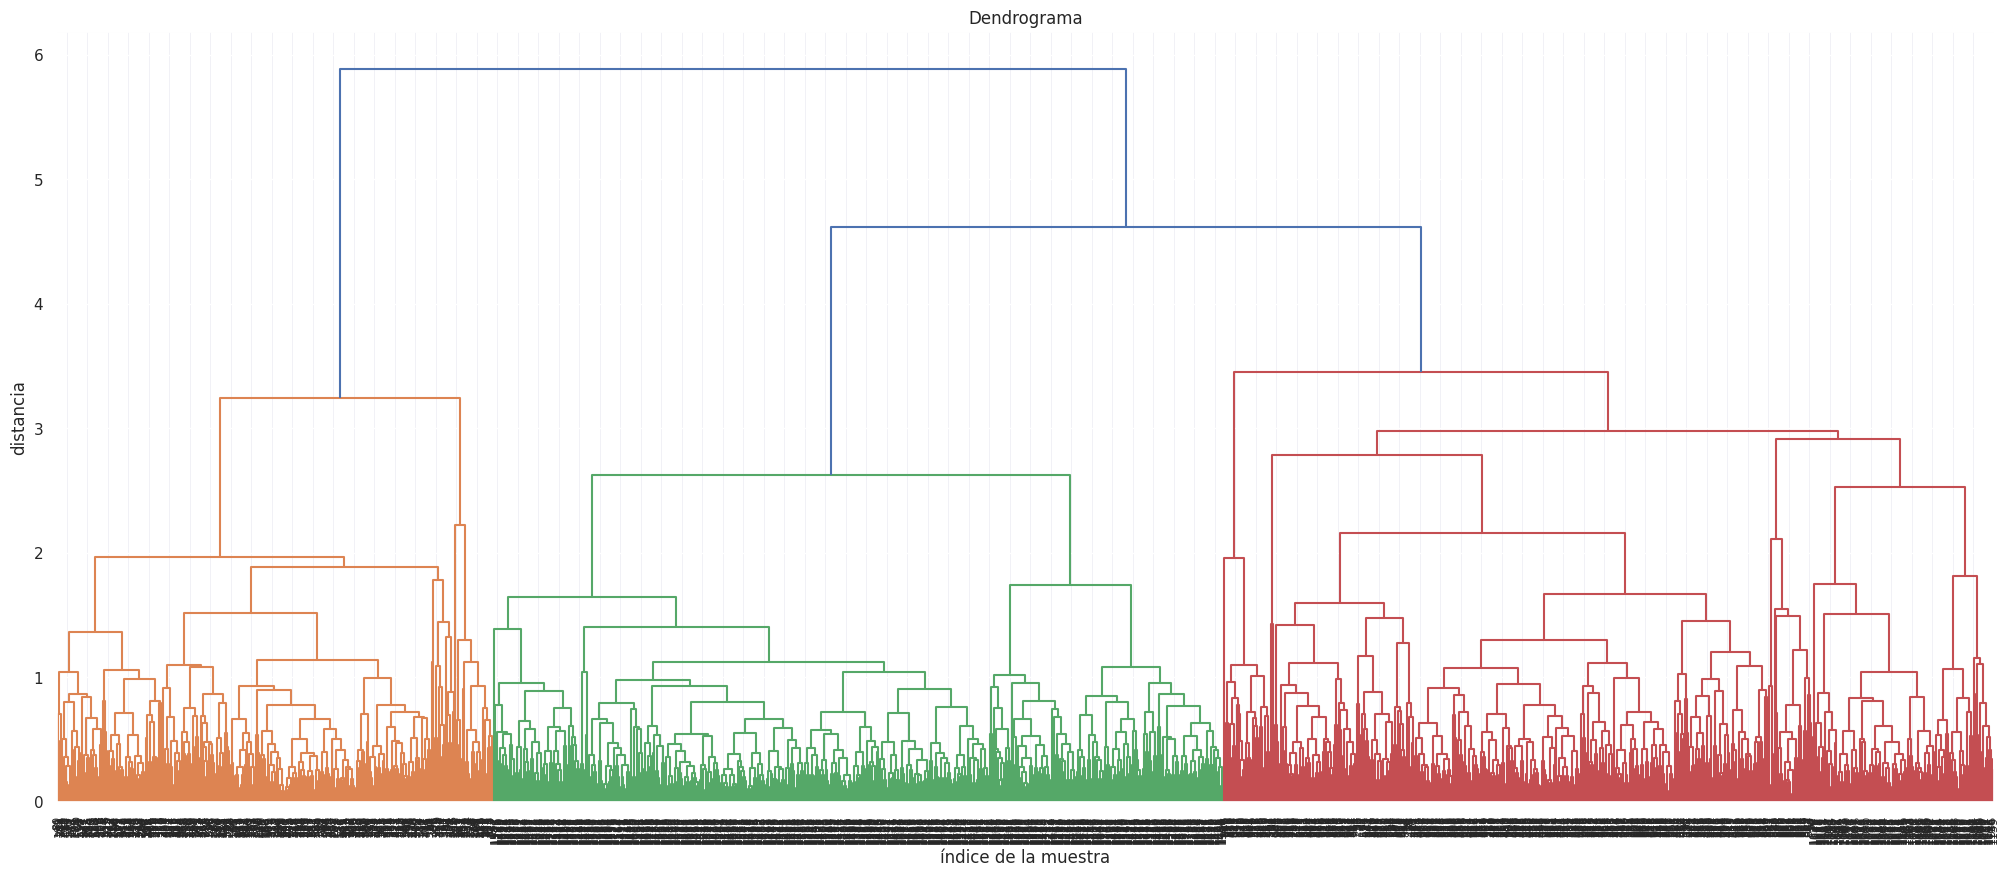

In [133]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Resumiendo el dendograma:

 -   Las lineas horizontales son uniones de clusters
 -   Las líneas verticales nos indican que clústers son parte de cada unión
 -   Las alturas de las líneas verticales nos indican la distancia que se "cubrió" al hacer la unión

 Además, el dendograma nos permite hacer cosas bastante útiles:

Visualizo la agrupación de los clusters con la respectiva cantidad de registros e identifico que se generan 3 clusters a partir de una distancia de 12 (no tenemos en cuenta el outlier identificado), por lo cual ese valor sera el punto de corte.

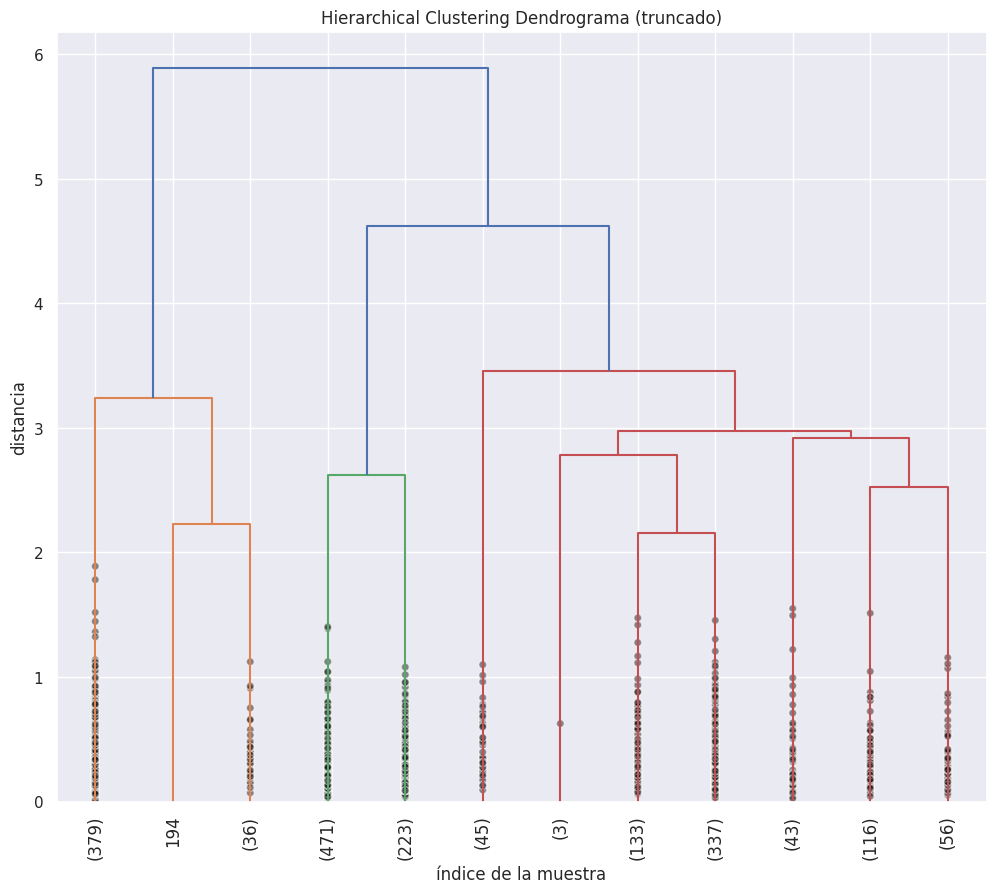

In [134]:
# quedarnos con las últimas p uniones
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=12,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Esta función calculo la distancia existente entre los clusters generados. 

In [135]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

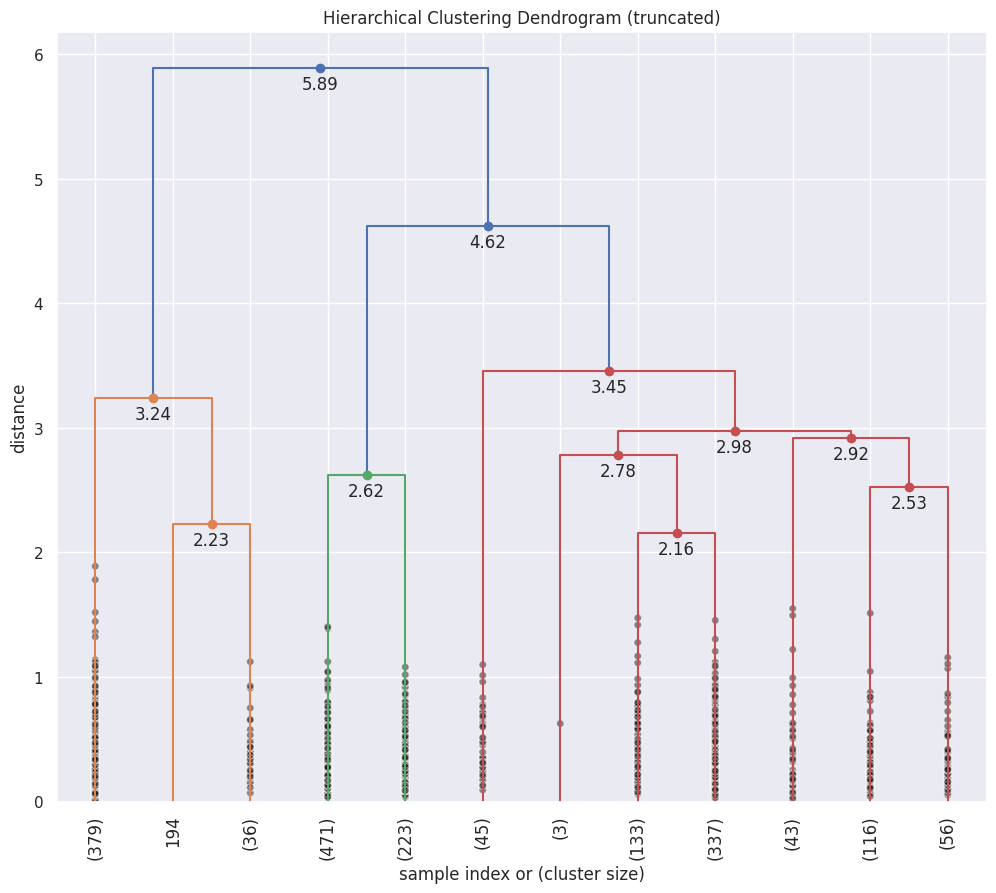

In [136]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

Defino el punto de de corte

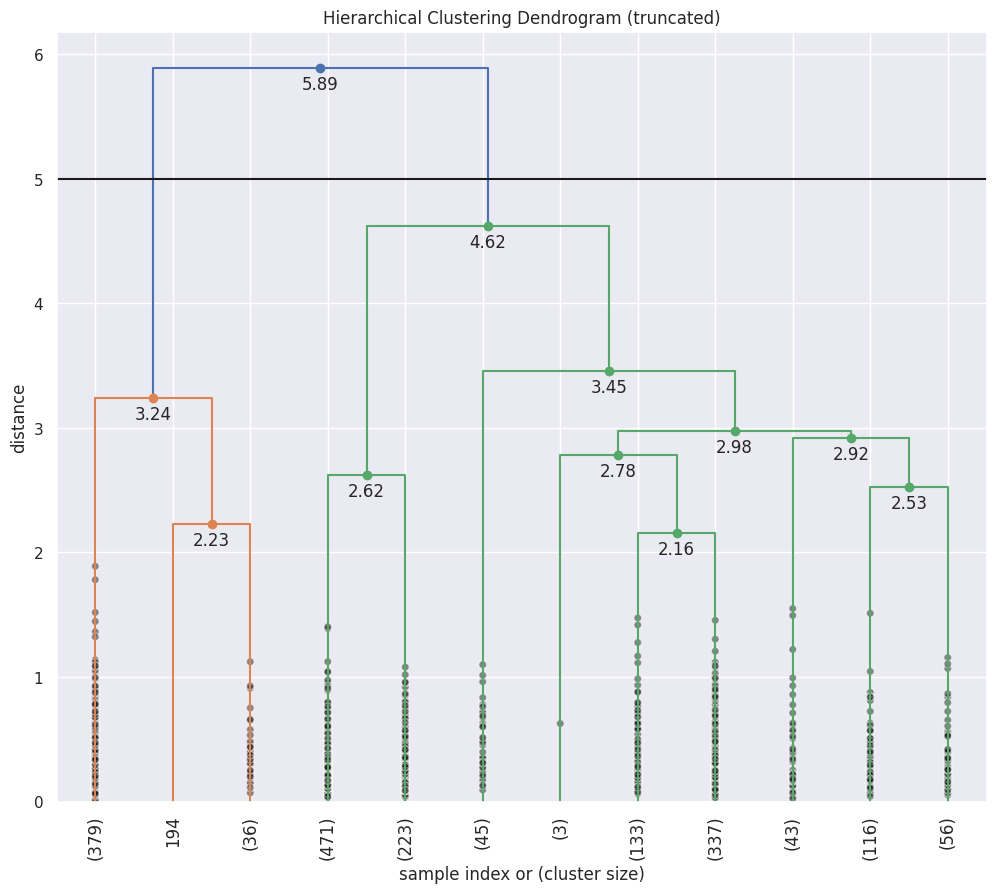

In [137]:
d_max = 5
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

Genero otra visualización interesante, la cual es un "clustermap" de seaborn. 

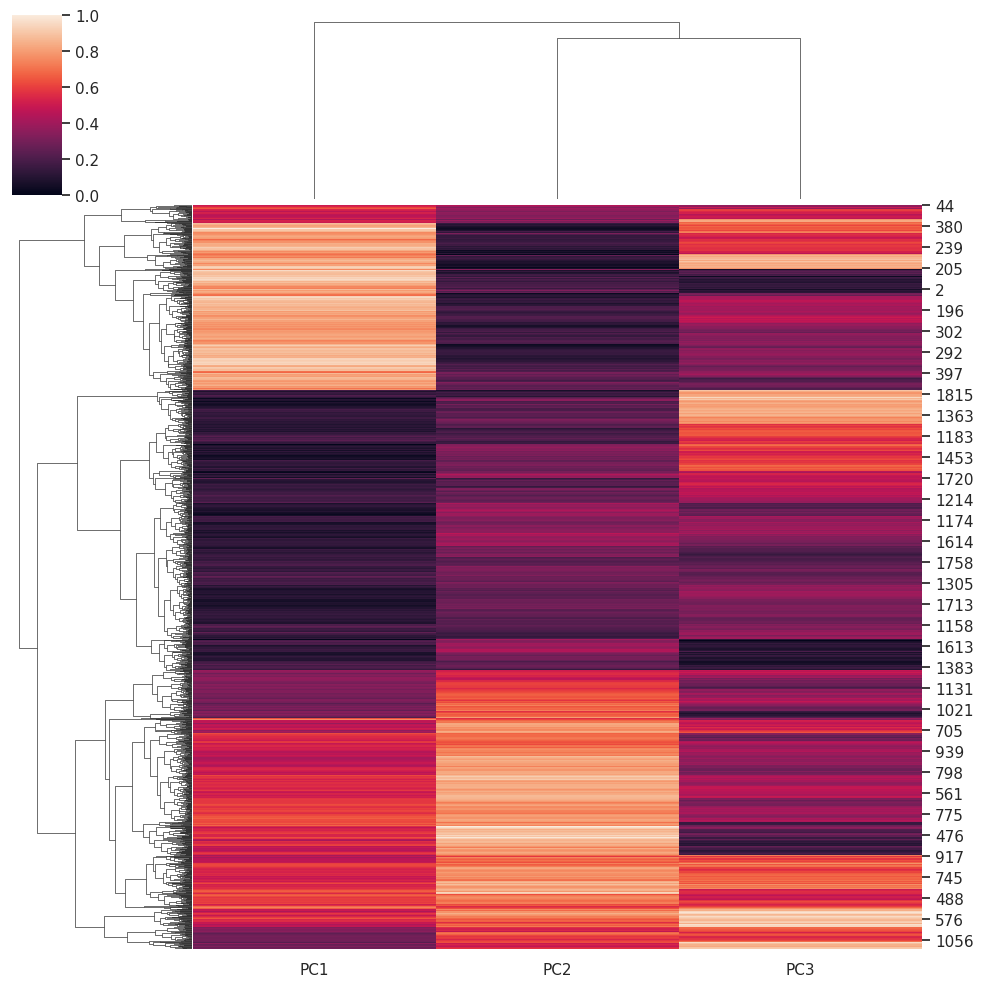

In [138]:
import seaborn as sns
sns.set(color_codes=True)
sns.clustermap(df_pca, standard_scale=1)

Para establecer que algoritmo de clusterización generó los mejores resultados, utilizo la metrica de Silueta para comparar cuantitativamente.

In [139]:
Z = linkage(df_pca, method='average')
cluster_labels = fcluster(Z, 3, criterion='maxclust')
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print("El coeficiente de silueta es silhouette_avg:", silhouette_avg)

El coeficiente de silueta es silhouette_avg: 0.5319417499642656


## K- means

Importo las librerias y modulos requeridos para trabajar con los datos.

In [140]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Clusterizo los datos usando el algoritmo K-means.



In [141]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['K_Cluster'] = kmeans.labels_
K_cluster_labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Visualizo el resultado obtenido con los parametros asignados.


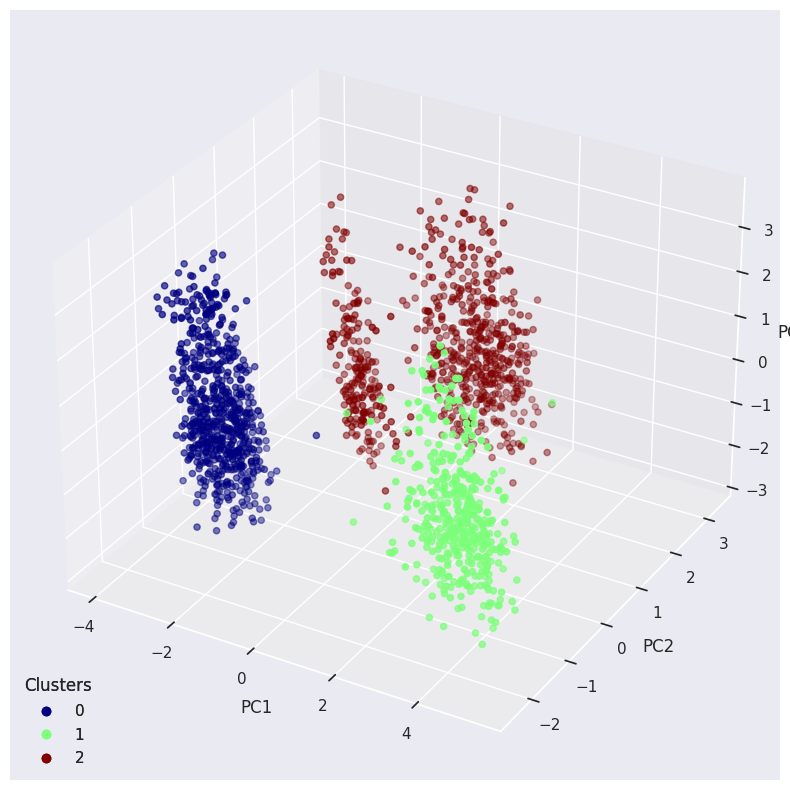

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['K_Cluster'], cmap="jet")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.show()


El resultado obetnido no esta mal pero hay que tener en cuenta que el algoritmo K-means está diseñado para trabajar con la distancia Euclidea, no lidia bien con datos con una covarianza alta en los datos.

Para establecer que algoritmo de clusterización generó los mejores resultados, 
utilizo la metrica de Silueta para comparar cuantitativamente.

In [143]:
silhouette_avg = silhouette_score(df_pca, K_cluster_labels)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.5676829438147865


## DBSCAN

Importo las librerias y modulos requeridos para trabajar con los datos.

In [144]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Clusterizo los datos usando el algoritmo DBSCAN

In [145]:
dbscan = DBSCAN (eps= 1.016, min_samples= 5)
dbscan.fit(df_pca[['PC1', 'PC2', 'PC3']])
df_pca['Cluster'] = dbscan.labels_
cluster_labels = dbscan.labels_

Visualizo el resultado obtenido con los parametros asignados.

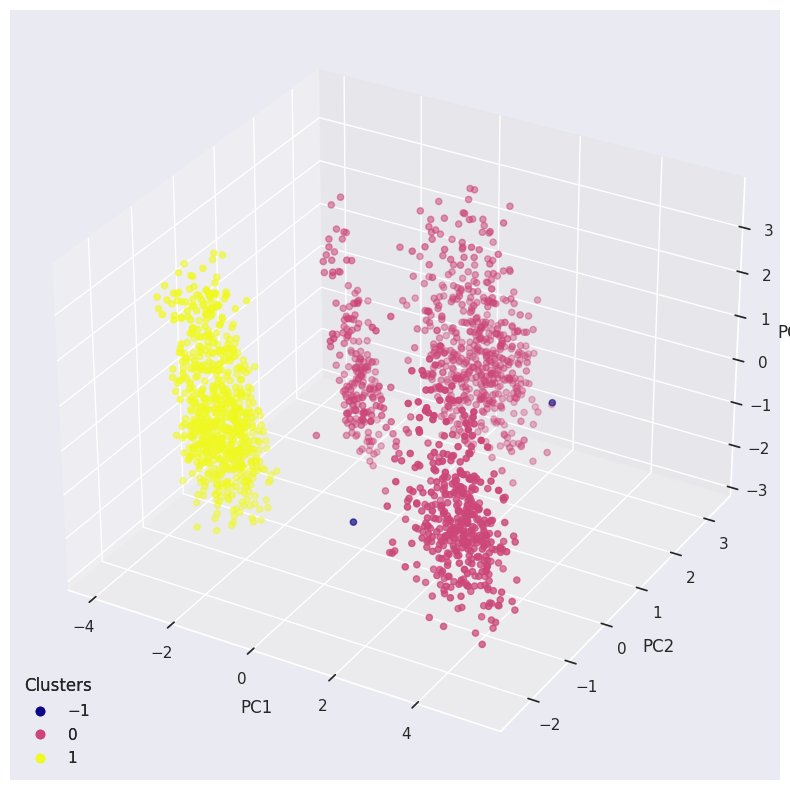

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap="plasma")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.show()


Para establecer que algoritmo de clusterización generó los mejores resultados, utilizo la metrica de Silueta para comparar cuantitativamente.

In [147]:
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.2557657815610786


# 8. Integrar target en Dataset

In [148]:
Data_clustered = pd.concat([Data, pd.Series(K_cluster_labels, name='cluster_labels')], axis=1)
print(Data_clustered.head())

   Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Edad   \
0         2          18.20         0.15         0.85          0.06   45.0   
1         5          31.75         0.07         0.57          0.00   25.0   
2         5          39.71         0.14         0.65          0.11   45.0   
3         3          23.23         0.06         0.57          0.00   38.0   
4         4           5.41         0.19         0.55          0.11   46.0   

    Salario   Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0       60.0    10.81          0.85           0.81               0.48   
1       36.0    25.45          0.74           0.83               0.69   
2       36.0    28.69          0.76           0.74               0.52   
3       36.0    13.20          0.75           0.82               0.54   
4       36.0     9.44          0.89           0.86               0.50   

   Reclamaciones  Genero_F  Genero_M  Nivel cargo_Junior  Nivel cargo_Semi  \
0             99    

In [149]:
Data_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 0 to 1842
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sucursal            1843 non-null   int64  
 1   Cumplimiento        1843 non-null   float64
 2   Efectividad         1843 non-null   float64
 3   Tareas Alto         1843 non-null   float64
 4   Tareas Medio        1843 non-null   float64
 5   Edad                1843 non-null   float64
 6    Salario            1843 non-null   float64
 7   Calidad             1843 non-null   float64
 8   Satisfacción        1843 non-null   float64
 9   Productividad       1843 non-null   float64
 10  Trabajo en equipo   1843 non-null   float64
 11  Reclamaciones       1843 non-null   int64  
 12  Genero_F            1843 non-null   uint8  
 13  Genero_M            1843 non-null   uint8  
 14  Nivel cargo_Junior  1843 non-null   uint8  
 15  Nivel cargo_Semi    1843 non-null   uint8  
 16  Nivel 

El atributo 'cluster_labels' debe estar como atributo de tipo numérico.

In [150]:
Data_clustered['cluster_labels']=Data_clustered['cluster_labels'].astype(int)
Data_clustered

Sucursal  Cumplimiento   Efectividad  Tareas Alto  Tareas Medio  Edad   \
0            2          18.20         0.15         0.85          0.06   45.0   
1            5          31.75         0.07         0.57          0.00   25.0   
2            5          39.71         0.14         0.65          0.11   45.0   
3            3          23.23         0.06         0.57          0.00   38.0   
4            4           5.41         0.19         0.55          0.11   46.0   
...        ...            ...          ...          ...           ...    ...   
1838         2          19.07         0.96         0.58          0.17   24.0   
1839         3          24.57         0.91         0.58          0.17   29.0   
1840         2           4.61         0.95         0.58          0.17   25.0   
1841         6          25.53         0.99         0.58          0.17   21.0   
1842         3          22.48         0.98         0.58          0.17   22.0   

       Salario   Calidad  Satisfacción  Productividad  Trabajo en equipo  \
0          60.0    10.81          0.85           0.81               0.48   
1          36.0    25.45          0.74           0.83               0.69   
2          36.0    28.69          0.76           0.74               0.52   
3          36.0    13.20          0.75           0.82               0.54   
4          36.0     9.44          0.89           0.86               0.50   
...         ...      ...           ...            ...                ...   
1838        9.0    11.57          0.37           0.39               0.90   
1839        7.0    22.04          0.43           0.46               0.80   
1840       13.0     7.81          0.52           0.26               0.70   
1841       13.0    21.65          0.19           0.87               0.92   
1842       12.0    21.22          0.44           0.55               0.71   

      Reclamaciones  Genero_F  Genero_M  Nivel cargo_Junior  Nivel cargo_Semi  \
0                99         0         1                   0                 0   
1                63         0         1                   0                 0   
2                66         0         1                   0                 0   
3                19         0         1                   0                 0   
4                16         0         1                   0                 0   
...             ...       ...       ...                 ...               ...   
1838             80         1         0                   1                 0   
1839             71         1         0                   1                 0   
1840             13         1         0                   1                 0   
1841             41         1         0                   1                 0   
1842             46         1         0                   1                 0   

      Nivel cargo_Senior  cluster_labels  
0                      1               1  
1                      1               1  
2                      1               1  
3                      1               1  
4                      1               1  
...                  ...             ...  
1838                   0               0  
1839                   0               0  
1840                   0               0  
1841                   0               0  
1842                   0               0  

[1843 rows x 18 columns]

Exporto el dataset clusterizado a excel para tener una copia de seguridad de los datos ya procesados. 

In [155]:
nombre_archivo = 'datos3.xlsx'
Data_clustered.to_excel(nombre_archivo, index=False)

# 9. Clasificación

En este punto genero la clasifcación de los datos utilizando algoritmo de machine learning de aprendizaje supervisado, con el fin de identificar el que genere los mejores resultados para el analisis de desempeño. 

# Partición de conjunto de training y test

In [159]:
from sklearn.model_selection import train_test_split
X = Data_clustered.drop('cluster_labels', axis=1)
y = Data_clustered['cluster_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Grid Search

# K-Folds

In [ ]:
from sklearn.model_selection import KFold

# Define el número de folds que deseas utilizar
num_folds = 5

# Crea un objeto KFold para dividir los datos en folds
kf = KFold(n_splits=num_folds)

# Realiza k-fold cross-validation para un modelo de aprendizaje automático específico
for train_index, test_index in kf.split(X):
    # Separa los datos de entrenamiento y prueba para cada fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Entrena el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    
    # Evalúa el modelo con los datos de prueba y muestra los resultados
    accuracy = model.score(X_test, y_test)
    print("Accuracy: ", accuracy)


## Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = dt.score(y_test. y_pred)
print("Precisión del modelo Decision Tree Classifier:", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score del modelo Decision Tree Classifier:", f1)

Precisión del modelo Decision Tree Classifier: 1.0
F1 Score del modelo Decision Tree Classifier: 0.9972878424218042


## Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest:", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score del modelo Random Forest:", f1)

Precisión del modelo Random Forest: 0.997289972899729
F1 Score del modelo Random Forest: 0.9972878424218042


## KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score del modelo KNN:", f1)

Precisión del modelo KNN: 1.0
F1 Score del modelo KNN: 0.9489103817686989


## Regresión Logística

In [164]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
Y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print("Precisión del modelo Regresión Logística::", accuracy)
f1 = f1_score(y_test, Y_pred, average='weighted')
print("F1 Score del modelo Regresión Logística:", f1)

Precisión del modelo Regresión Logística:: 0.994579945799458
F1 Score del modelo Regresión Logística: 0.9945711731832979


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Máquinas de Vectores de Soporte

In [165]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
Y_pred = SVM.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print("Precisión del modelo SVM:", accuracy)
f1 = f1_score(y_test, Y_pred, average='weighted')
print("F1 Score del modelo SVM:", f1)

Precisión del modelo SVM: 0.964769647696477
F1 Score del modelo SVM: 0.9649956440987086


## Matriz de confusión

Matriz de confusión para el modelo de árbol de decisión:
[[152   0   0]
 [  0  90   1]
 [  0   0 126]]


<Axes: >

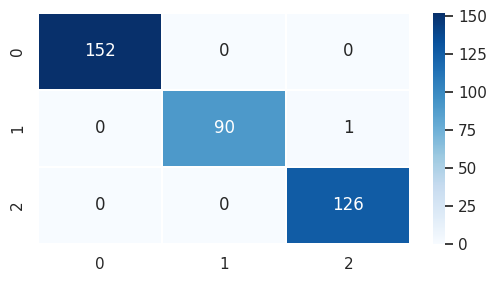

In [151]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred)
print("Matriz de confusión para el modelo de árbol de decisión:")
print(cm_dt)

plt.figure(figsize=(6,3))
sns.heatmap(cm_dt,                     
            annot=True,                     
            cmap="Blues",linewidths=.10, fmt= '.0f')

## Resultados

comentar mejores resultados
y explicar porque se utilizaron los modelos y se elige como final 

Se generó la matriz de correlación de los atributos, donde se identificó que las principales correlaciónes entre las variables se asocian a las variables sociodrmograficas de los empleados ya que estas se aproximan considerablemente a 1. Destacan las correcionales entre el nivel de cargo y la edad, salario, ciudad, modalidad de trabajo y nivel educativo.  Por lo anterior, se entiende que parte de los datos se comportan de forma dependiente y por lo cual existe dependencia entre los atributos del dataset.

Text(0.5, 1.0, 'Variables Correlation')

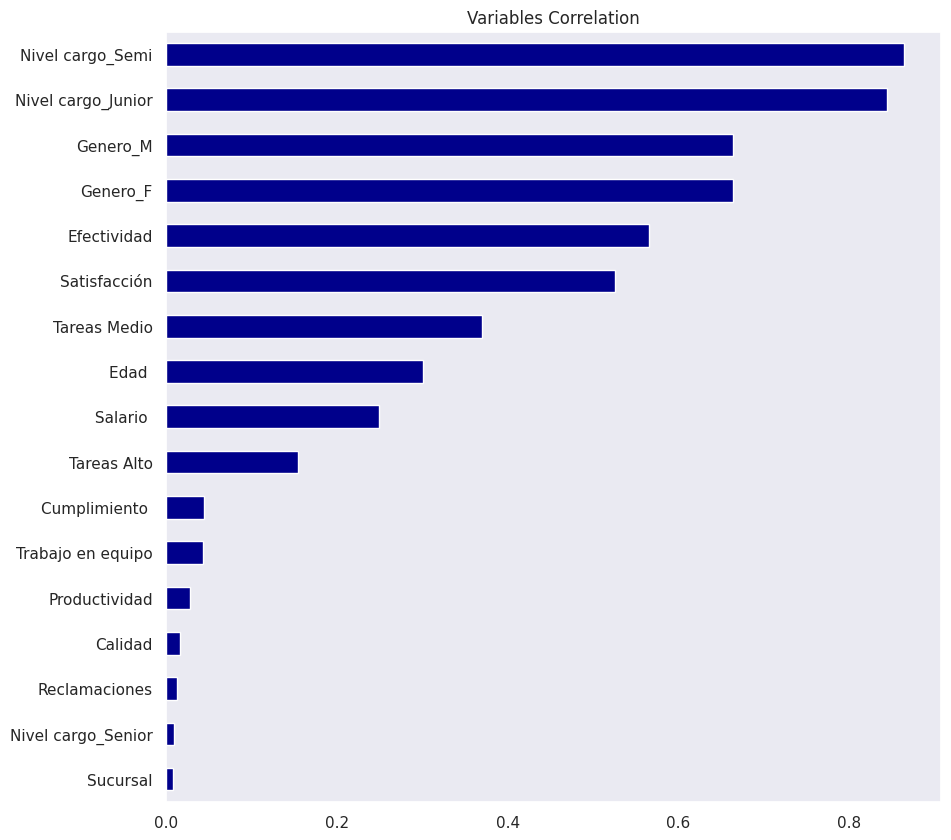

In [166]:
Data_clustered.corr().abs().cluster_labels.drop('cluster_labels').sort_values().plot.barh(color='darkblue',figsize=(10,10))
plt.title('Variables Correlation')